# Introduction
This notebook will test the effects of discount on customer behavior by looking for possible effects on customer order frequency and average customer order total. To do this, two target variables, NumOrders and AvgTotal will be created by grouping the data by CustomerId. Then,  suitable groups will be determined, and tested for significant effects.<br><br>

#### Outline:
[Data Wrangling](#wrangling)<br>
> [Building DataFrame](#dataframe_build)<br>
[Transforming Targets](#transformation)<br>

[Effect of Discount on Customer Order Frequency](#discount_orderfreq)<br>
> [Testing Continuous Variable](#continuous1)<br>
[Testing Categorical Variable](#categorical1)<br>
>> [Linear Regression](#linreg1)<br>
[Post-hoc tests](#posthoc1)<br>
[Bayesian Estimation](#best1)<br>

[Effect of Discount on Customer Average Order Total](#discount_ordertotal)<br>
> [Testing Continuous Variable](#continuous2)<br>
[Testing Categorical Variable](#categorical2)<br>
>> [Linear Regression](#linreg2)<br>
[Post-hoc tests](#posthoc2)<br>
[Bayesian Estimation](#best2)<br>

[Effect of Discount Frequency on Order Frequency](#discountfreq_orderfreq)<br>
[Effect of Discount Frequency on Avg Order Total](#discountfreq_avgtotal)<br>

In [42]:
from jupyterthemes import jtplot
import my_functions as mf
import numpy as np
import pandas as pd
import pingouin as pi
import pymc3 as pm
import seaborn as sns
import scikit_posthocs as sp
import scipy.stats as stats
import sqlite3 as sql

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
jtplot.style()

In [2]:
plt.style.use('ggplot')

In [3]:
params = {"ytick.color" : (.90,.90,.90),
          "xtick.color" : (.90,.90,.90),
          "axes.labelcolor" : (.90,.90,.90),
          "axes.edgecolor" : (.90,.90,.90)}
plt.rcParams.update(params)

In [169]:
params = {"ytick.color" : 'w',
          "xtick.color" : 'w',
          "axes.labelcolor" : 'w',
          "axes.edgecolor" : 'w'}
plt.rcParams.update(params)

In [4]:
plt.rcParams.get('ytick.color')

(0.9, 0.9, 0.9)

In [5]:
mf.plt.rcParams.get('ytick.color')

(0.9, 0.9, 0.9)

In [45]:
%load_ext autoreload
%autoreload 1
%aimport my_functions
%aimport jupyterthemes.jtplot

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<a id='wrangling'></a>
## Data Wrangling

#### Loading the DataFrame

In [6]:
df = pd.read_csv('clean_data.csv')
df.head()

,Unnamed: 0,OrderID,OrderDate,RequiredDate,ItemCount,OrderTotal,WeightedDiscount,CustomerId,CustomerCompany,CustomerCity,...,EmployeeSuper,Discount,OrderTotalLog,ItemCountLog,OrderTotalSqrt,ItemCountSqrt,OrderTotalCbrt,ItemCountCbrt,OrderTotal4rt,ItemCount4rt
0,0,10248,2012-07-04,2012-08-01,27,440.00,0.000000,VINET,Vins et alcools Chevalier,Reims,...,2.0,0.00,6.086775,3.295837,20.976177,5.196152,7.605905,3.000000,4.579976,2.279507
1,1,10249,2012-07-05,2012-08-16,49,1863.40,0.000000,TOMSP,Toms Spezialitäten,Münster,...,5.0,0.00,7.530158,3.891820,43.167117,7.000000,12.305578,3.659306,6.570169,2.645751
2,2,10250,2012-07-08,2012-08-05,60,1552.60,0.125000,HANAR,Hanari Carnes,Rio de Janeiro,...,2.0,0.10,7.347686,4.094345,39.403046,7.745967,11.579413,3.914868,6.277185,2.783158
3,3,10251,2012-07-08,2012-08-05,41,654.06,0.025610,VICTE,Victuailles en stock,Lyon,...,2.0,0.05,6.483199,3.713572,25.574597,6.403124,8.680389,3.448217,5.057133,2.530440
4,4,10252,2012-07-09,2012-08-06,105,3597.90,0.030952,SUPRD,Suprêmes délices,Charleroi,...,2.0,0.05,8.188106,4.653960,59.982497,10.246951,15.323208,4.717694,7.744837,3.201086


Linear Regression for OrderTotal4rt~ItemCount4rt


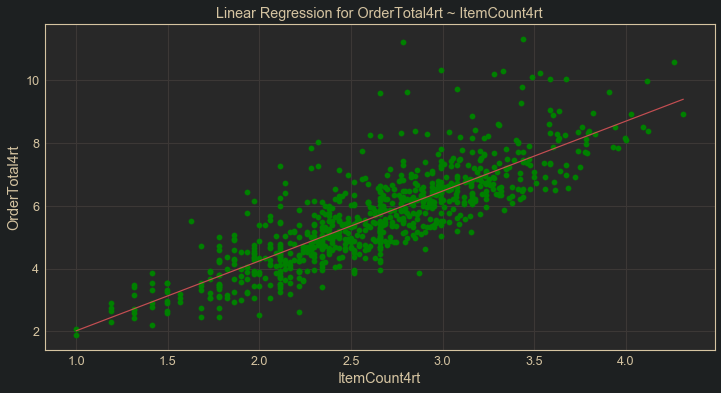

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          OrderTotal4rt   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     1722.
Date:                Thu, 16 Apr 2020   Prob (F-statistic):          1.56e-201
Time:                        15:04:31   Log-Likelihood:                -1019.8
No. Observations:                 801   AIC:                             2044.
Df Residuals:                     799   BIC:                             2053.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.2112      0.145     -1.459      0.145      -0.495       0.073
ItemCount4rt     2.2282      0.054     41.493      0.000       2.123       2.334
==============================================================================
Omnibus:                      226.189   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              748.537
Skew:                           1.343   Prob(JB):                    2.87e-163
Kurtosis:                       6.901   Cond. No.                         14.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Test for homoscedasticity of residuals:


,F_statistic,p_value
Goldfeld-Quandt,1.26824,0.0124201


Normality Test Results for ['residuals']:
-------------------------------------------------------------------------------------------


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 residuals 
 Statistic 
 1.076414e-01 
 9.237141e-01 
 
 
 p-value 
 1.548154e-08 
 1.037824e-19 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 residuals 
 11.483974 
 0.783

Skew: 1.3425973496042187
Kurtosis: 3.9010012808967875


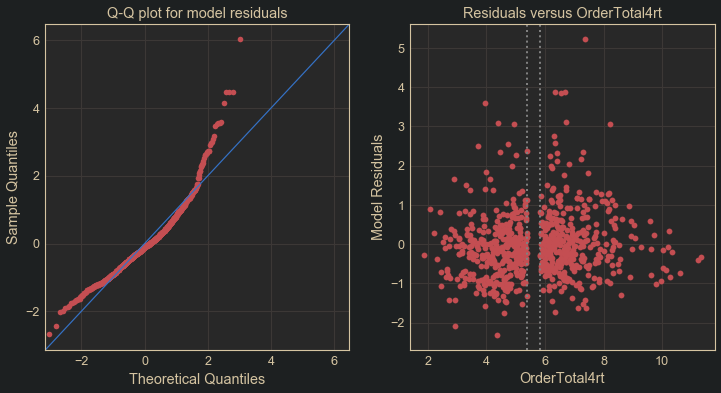

In [7]:
# I am interested in a quick check to see if OrderTotal is strongly correlated with ItemCount
mf.do_a_linreg(df, 'ItemCount4rt', 'OrderTotal4rt')

In [8]:
# We can see that the model does not meet the assumptions of a linear regression, since the
# residuals are skewed and non-normal. This seems to be caused by large variance in OrderTotals
# toward higher amounts with lower numbers of items. This is likely caused by some very
# expensive items in the inventory being bought in those orders. If we were to leave out orders
# containing exceptionally expensive products, we would see this regression improve. The visual
# is enough to determine that there is a positive relationship between the variables, whether
# or not it is perfectly linear.
stats.pearsonr(df.OrderTotal4rt, df.ItemCount4rt)

(0.8264532096837509, 1.5581290633430084e-201)

In [9]:
# We can see that the Pearson's r-score is positive and significant.

In [10]:
df['DiscountApplied'] = pd.cut(x = df.WeightedDiscount, 
                               bins = [-1, 0, 0.30],
                               labels = ['no_discount', 'discount'])
df.head()

,Unnamed: 0,OrderID,OrderDate,RequiredDate,ItemCount,OrderTotal,WeightedDiscount,CustomerId,CustomerCompany,CustomerCity,...,Discount,OrderTotalLog,ItemCountLog,OrderTotalSqrt,ItemCountSqrt,OrderTotalCbrt,ItemCountCbrt,OrderTotal4rt,ItemCount4rt,DiscountApplied
0,0,10248,2012-07-04,2012-08-01,27,440.00,0.000000,VINET,Vins et alcools Chevalier,Reims,...,0.00,6.086775,3.295837,20.976177,5.196152,7.605905,3.000000,4.579976,2.279507,no_discount
1,1,10249,2012-07-05,2012-08-16,49,1863.40,0.000000,TOMSP,Toms Spezialitäten,Münster,...,0.00,7.530158,3.891820,43.167117,7.000000,12.305578,3.659306,6.570169,2.645751,no_discount
2,2,10250,2012-07-08,2012-08-05,60,1552.60,0.125000,HANAR,Hanari Carnes,Rio de Janeiro,...,0.10,7.347686,4.094345,39.403046,7.745967,11.579413,3.914868,6.277185,2.783158,discount
3,3,10251,2012-07-08,2012-08-05,41,654.06,0.025610,VICTE,Victuailles en stock,Lyon,...,0.05,6.483199,3.713572,25.574597,6.403124,8.680389,3.448217,5.057133,2.530440,discount
4,4,10252,2012-07-09,2012-08-06,105,3597.90,0.030952,SUPRD,Suprêmes délices,Charleroi,...,0.05,8.188106,4.653960,59.982497,10.246951,15.323208,4.717694,7.744837,3.201086,discount


Showing stats for OrderTotal4rt grouped by DiscountApplied


,Mean,Median,Std,Size
no_discount,5.462229,5.375051,1.583248,434
discount,5.898035,5.926976,1.445413,367


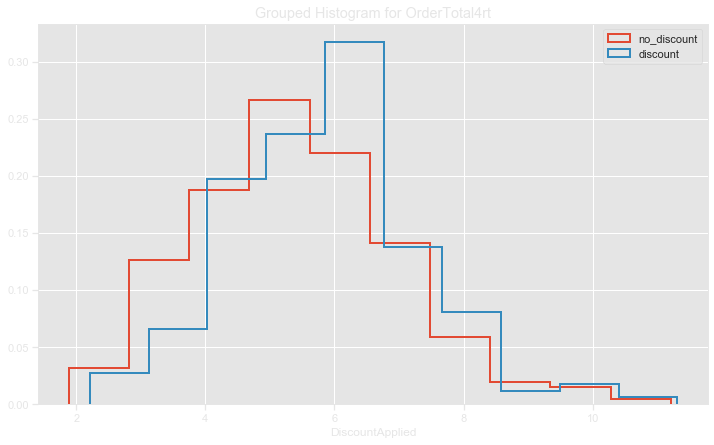

Reverse-transformed non-discount order total mean:
 890.1835589960891
Reverse-transformed discount order total mean:
 1210.122942601669
Ratio between discount mean and non-discount mean:
 1.3594083269369677
Showing stats for ItemCount4rt grouped by DiscountApplied


,Mean,Median,Std,Size
no_discount,2.507061,2.432299,0.585961,434
discount,2.787993,2.794682,0.510373,367


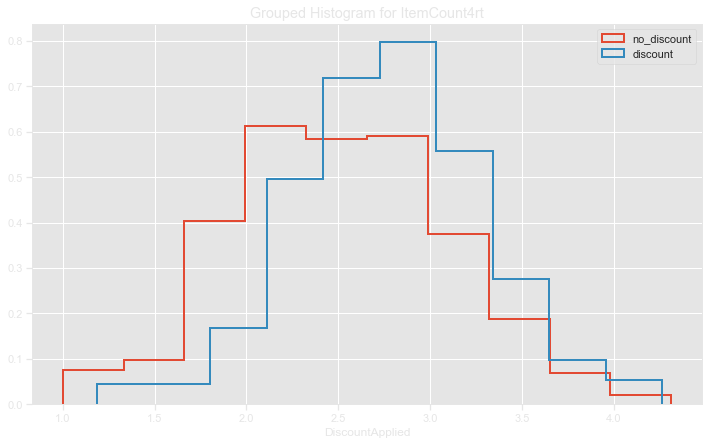

Reverse-transformed non-discount item count mean:
 39.505664857328505
Reverse-transformed discount item count mean:
 60.41804039082684
Ratio between discount mean and non-discount mean:
 1.5293513122490578
Testing DiscountApplied groups for statistically significant effects on OrderTotal4rt


,discount
effect size,0.286402
p-val,0.000052
power,0.972229
size,367.000000


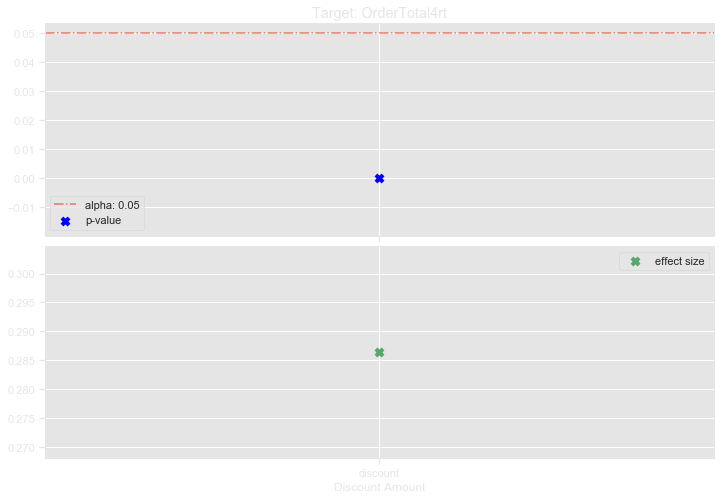

Testing DiscountApplied groups for statistically significant effects on ItemCount4rt


,discount
effect size,0.508363
p-val,0.000000
power,1.000000
size,367.000000


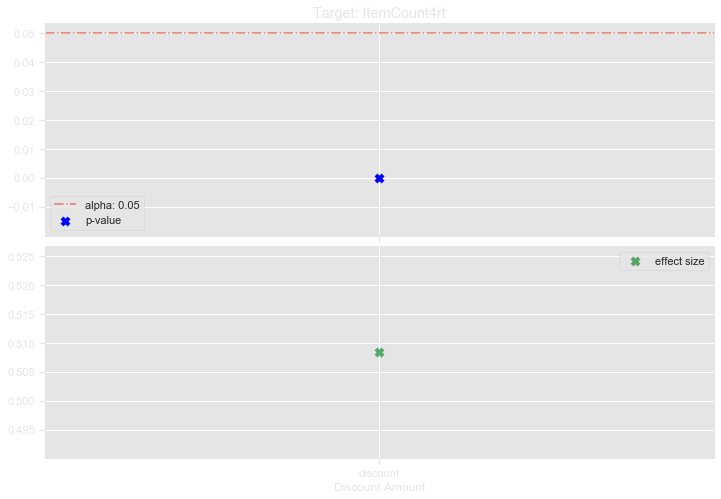

In [157]:
info = mf.group_hist(df, 'DiscountApplied', 'OrderTotal4rt')
control_mean = info.loc['no_discount', 'Mean'] ** 4
discount_mean = info.loc['discount', 'Mean'] ** 4
ratio1 = discount_mean / control_mean
print("Reverse-transformed non-discount order total mean:\n", control_mean)
print("Reverse-transformed discount order total mean:\n", discount_mean)
print("Ratio between discount mean and non-discount mean:\n", ratio1)
info = mf.group_hist(df, 'DiscountApplied', 'ItemCount4rt')
control_mean = info.loc['no_discount', 'Mean'] ** 4
discount_mean = info.loc['discount', 'Mean'] ** 4
ratio1 = discount_mean / control_mean
print("Reverse-transformed non-discount item count mean:\n", control_mean)
print("Reverse-transformed discount item count mean:\n", discount_mean)
print("Ratio between discount mean and non-discount mean:\n", ratio1)
mf.compare_groups(df, 'DiscountApplied', ['OrderTotal4rt','ItemCount4rt'], control_group='no_discount')

In [63]:
# This has shown that applying discount to orders causes a statistically significant postive
# impact on both OrderTotals and ItemCounts, by factors of 1.36 and 1.52 respectively, measured
# from quite large sample sizes which should be converging on true means.

In [159]:
# Creating MCMC simulation to generate posterior in order to determine average mean difference
µ_prior = df.OrderTotal4rt.mean()
σ_prior = df.OrderTotal4rt.std(ddof=1)
control_group = df[df.DiscountApplied == 'no_discount']['OrderTotal4rt']
discount_group = df[df.DiscountApplied == 'discount']['OrderTotal4rt']
low_std = 0
high_std = 10

with pm.Model() as model3:
    # Modelling priors
    control_mean = pm.Normal('Control mean', mu=µ_prior, sd=σ_prior)
    discount_mean = pm.Normal('Discount mean', mu=µ_prior, sd=σ_prior)
    control_std = pm.Uniform('Control std', lower=low_std, upper=high_std)
    discount_std = pm.Uniform('Discount std', lower=low_std, upper=high_std)
    
    # Setting posteriors
    control = pm.Normal('No Discount', mu=control_mean, sd=control_std, observed=control_group)
    discount = pm.Normal('Discount', mu=discount_mean, sd=discount_std, observed=discount_group)
    
    # Setting deterministics:
    mean_diffs = pm.Deterministic('Mean Differences', discount_mean-control_mean)
    control_means = pm.Deterministic('Control Means', control_mean)
    discount_means = pm.Deterministic('Discount Means', discount_mean)

In [160]:
with model3:
    trace = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Discount std, Control std, Discount mean, Control mean]
Sampling 4 chains, 0 divergences: 100%|██████████| 10000/10000 [00:10<00:00, 920.68draws/s]


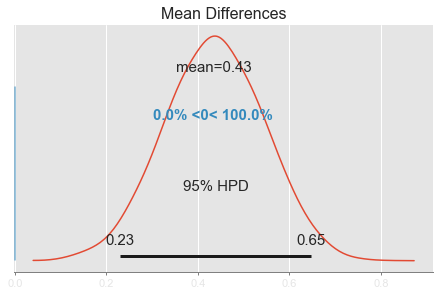

In [161]:
with model3:
    pm.plot_posterior(trace, 
                      var_names='Mean Differences', 
                      credible_interval=0.95,
                      ref_val=0
                     )

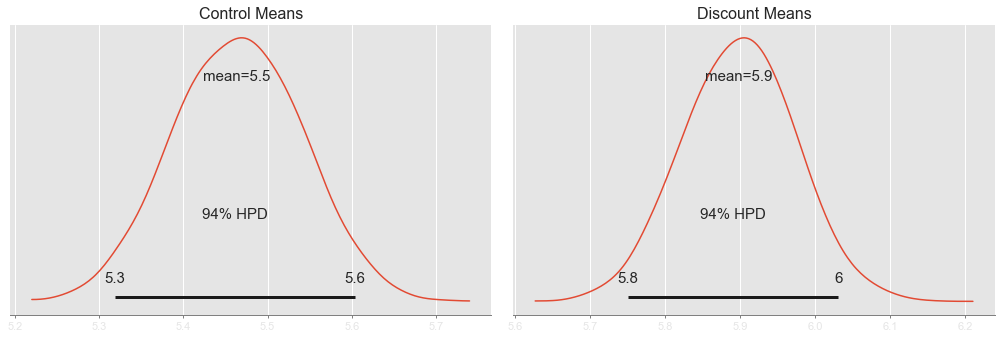

In [162]:
with model3:
    pm.plot_posterior(trace,
                      var_names=['Control Means',
                                 'Discount Means'
                                ]
                      
                     )

In [163]:
pm.summary(trace, var_names=['Control Means', 'Discount Means'])

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
Control Means,5.464,0.076,5.318,5.603,0.001,0.0,11770.0,11765.0,11749.0,6387.0,1.0
Discount Means,5.898,0.075,5.751,6.031,0.001,0.0,11360.0,11350.0,11360.0,6477.0,1.0


In [164]:
# Reverse transforming posterior means for comparison:
with model3:
    revtrans_controlmean = trace.get_values('Control Means').mean() ** 4
    revtrans_discountmean = trace.get_values('Discount Means').mean() ** 4
ratio = revtrans_discountmean / revtrans_controlmean
print("Control: {}, Discount: {}, Ratio: {}".format(revtrans_controlmean,
                                                    revtrans_discountmean,
                                                    ratio
                                                   ))

Control: 891.1964005666857, Discount: 1209.7972358521433, Ratio: 1.3574978928133783


In [ ]:
# We can see that the Bayesian Estimation has produced mean values for the posteriors that
# closely matches the means of the groups, as tends to be the case when using weak priors.
# Discounted orders are 36% larger on average.

Performing bootstrap simulation for parameter: mean
Testing control group: no_discount
Testing control group: discount


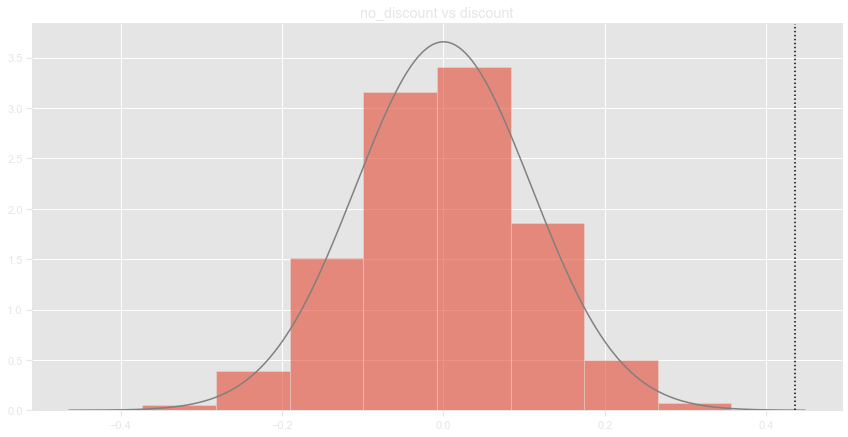

,discount
p_val to no_discount,0.00015


In [158]:
mf.bootstrap_sim(df, 'DiscountApplied', 'OrderTotal4rt', show_hist=True)

Performing bootstrap simulation for parameter: median
Testing control group: no_discount
Testing control group: discount


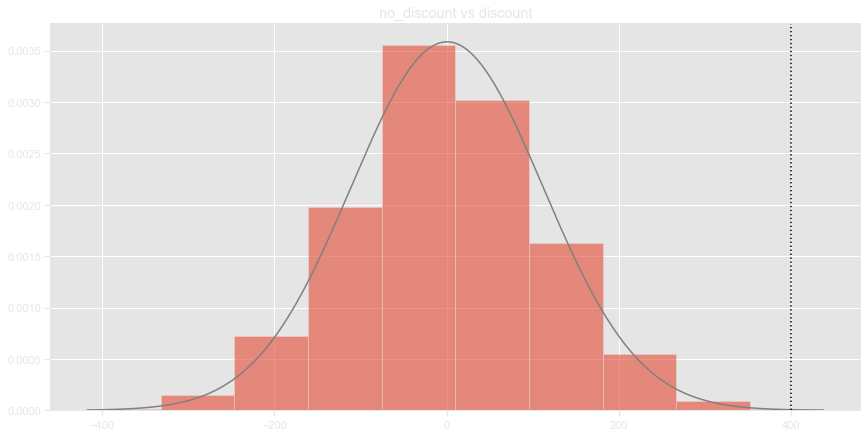

,discount
p_val to no_discount,0.00035


In [165]:
mf.bootstrap_sim(df, 'DiscountApplied', 'OrderTotal', param='median', show_hist=True)

In [168]:
sp.posthoc_dunn(df, group_col='DiscountApplied', val_col='OrderTotal')

,discount,no_discount
discount,-1.000000,0.000017
no_discount,0.000017,-1.000000


In [64]:
# Checking CustomerId column for errors that were detected in another notebook
df.CustomerId.unique()

array(['VINET', 'TOMSP', 'HANAR', 'VICTE', 'SUPRD', 'CHOPS', 'RICSU',
       'WELLI', 'HILAA', 'ERNSH', 'CENTC', 'OTTIK', 'QUEDE', 'RATTC',
       'FOLKO', 'BLONP', 'WARTH', 'FRANK', 'GROSR', 'WHITC', 'SPLIR',
       'QUICK', 'MAGAA', 'TORTU', 'MORGK', 'BERGS', 'LEHMS', 'ROMEY',
       'LILAS', 'RICAR', 'REGGC', 'BSBEV', 'COMMI', 'TRADH', 'HUNGO',
       'WANDK', 'GODOS', 'OLDWO', 'LONEP', 'ANATR', 'THEBI', 'ISLAT',
       'PERIC', 'KOENE', 'SAVEA', 'BOLID', 'FURIB', 'BONAP', 'MEREP',
       'PRINI', 'SIMOB', 'FAMIA', 'LAMAI', 'PICCO', 'AROUT', 'SEVES',
       'DRACD', 'EASTC', 'GALED', 'VAFFE', 'WOLZA', 'HUNGC', 'SANTG',
       'BOTTM', 'LINOD', 'FOLIG', 'FRANS', 'GOURL', 'CONSH', 'RANCH',
       'LAZYK', 'LAUGB', 'BLAUS', 'NORTS', 'CACTU', 'GREAL', 'MAISD',
       'TRAIH', 'LETSS', 'WILMK', 'THECR', 'ALFKI', 'FRANR', 'SPECD',
       'LACOR'], dtype=object)

In [65]:
# It seems that there are none of the accidental 4-character long records in this dataframe
# To be sure, I will load a dataframe from the Customer table to compare IDs and make sure 
# that all values in the CustomerId column have matches in the Customer data
conn = sql.connect('Northwind_small.sqlite')
cur = conn.cursor()

In [66]:
cur.execute("""SELECT * FROM Customer;""")
customers = pd.DataFrame(cur.fetchall())
customers.columns = [x[0] for x in cur.description]
customers.head()

,Id,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
0,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,Western Europe,12209,Germany,030-0074321,030-0076545
1,ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,México D.F.,Central America,05021,Mexico,(5) 555-4729,(5) 555-3745
2,ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,Central America,05023,Mexico,(5) 555-3932,None
3,AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,London,British Isles,WA1 1DP,UK,(171) 555-7788,(171) 555-6750
4,BERGS,Berglunds snabbköp,Christina Berglund,Order Administrator,Berguvsvägen 8,Luleå,Northern Europe,S-958 22,Sweden,0921-12 34 65,0921-12 34 67


In [67]:
# Checking the number of unique Customer IDs, we can see there are some customers who did not
# place orders in our data.
customers.Id.nunique()

91

In [68]:
# Checking for any CustomerId that is not present in Customer table
df[~df.CustomerId.isin(customers.Id)].CustomerId.value_counts()

Series([], Name: CustomerId, dtype: int64)

In [69]:
# We can see that there are no discrepancies/errors in the CustomerId column

In [70]:
# While I'm at it, might as well check what 6 customers did not place orders
customers[~customers.Id.isin(df.CustomerId)]

,Id,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
2,ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,Central America,05023,Mexico,(5) 555-3932,None
17,DUMON,Du monde entier,Janine Labrune,Owner,"67, rue des Cinquante Otages",Nantes,Western Europe,44000,France,40.67.88.88,40.67.89.89
21,FISSA,FISSA Fabrica Inter. Salchichas S.A.,Diego Roel,Accounting Manager,"C/ Moralzarzal, 86",Madrid,Southern Europe,28034,Spain,(91) 555 94 44,(91) 555 55 93
53,OCEAN,Océano Atlántico Ltda.,Yvonne Moncada,Sales Agent,Ing. Gustavo Moncada 8585 Piso 20-A,Buenos Aires,South America,1010,Argentina,(1) 135-5333,(1) 135-5535
56,PARIS,Paris spécialités,Marie Bertrand,Owner,"265, boulevard Charonne",Paris,Western Europe,75012,France,(1) 42.34.22.66,(1) 42.34.22.77
61,QUEEN,Queen Cozinha,Lúcia Carvalho,Marketing Assistant,"Alameda dos Canàrios, 891",Sao Paulo,South America,05487-020,Brazil,(11) 555-1189,None


<a id='dataframe_build'></a>
### Building DataFrame: aggregated by CustomerId

In [11]:
df['DiscountApplied'] = ~df.WeightedDiscount.isin([0])
df.head()

,Unnamed: 0,OrderID,OrderDate,RequiredDate,ItemCount,OrderTotal,WeightedDiscount,CustomerId,CustomerCompany,CustomerCity,...,Discount,OrderTotalLog,ItemCountLog,OrderTotalSqrt,ItemCountSqrt,OrderTotalCbrt,ItemCountCbrt,OrderTotal4rt,ItemCount4rt,DiscountApplied
0,0,10248,2012-07-04,2012-08-01,27,440.00,0.000000,VINET,Vins et alcools Chevalier,Reims,...,0.00,6.086775,3.295837,20.976177,5.196152,7.605905,3.000000,4.579976,2.279507,False
1,1,10249,2012-07-05,2012-08-16,49,1863.40,0.000000,TOMSP,Toms Spezialitäten,Münster,...,0.00,7.530158,3.891820,43.167117,7.000000,12.305578,3.659306,6.570169,2.645751,False
2,2,10250,2012-07-08,2012-08-05,60,1552.60,0.125000,HANAR,Hanari Carnes,Rio de Janeiro,...,0.10,7.347686,4.094345,39.403046,7.745967,11.579413,3.914868,6.277185,2.783158,True
3,3,10251,2012-07-08,2012-08-05,41,654.06,0.025610,VICTE,Victuailles en stock,Lyon,...,0.05,6.483199,3.713572,25.574597,6.403124,8.680389,3.448217,5.057133,2.530440,True
4,4,10252,2012-07-09,2012-08-06,105,3597.90,0.030952,SUPRD,Suprêmes délices,Charleroi,...,0.05,8.188106,4.653960,59.982497,10.246951,15.323208,4.717694,7.744837,3.201086,True


In [12]:
aggs = pd.DataFrame(df.groupby('CustomerId')['OrderID'].nunique())
aggs2 = pd.DataFrame(df.groupby('CustomerId')['WeightedDiscount'].median())
aggs3 = pd.DataFrame(df.groupby('CustomerId')['OrderTotal'].median())
aggs4 = pd.DataFrame(df.groupby('CustomerId')['DiscountApplied'].sum())
aggs = pd.concat([aggs,aggs2,aggs3,aggs4],axis=1)
aggs.head()

,OrderID,WeightedDiscount,OrderTotal,DiscountApplied
CustomerId,,,,
ALFKI,6,0.028431,830.150,4.0
ANATR,4,0.000000,399.875,0.0
AROUT,13,0.000000,480.000,5.0
BERGS,18,0.017213,1277.600,9.0
BLAUS,7,0.000000,464.000,0.0


In [13]:
aggs.rename(columns={'OrderID':'NumOrders',
                     'OrderTotal':'AvgTotal',
                     'DiscountApplied':'DiscountFreq'
                    }, inplace=True)
aggs.describe()

,NumOrders,WeightedDiscount,AvgTotal,DiscountFreq
count,85.000000,85.000000,85.000000,85.000000
mean,9.423529,0.027418,894.418509,4.317647
std,5.880510,0.038514,598.652272,4.639919
min,1.000000,0.000000,90.750000,0.000000
25%,5.000000,0.000000,464.000000,0.000000
50%,9.000000,0.000000,716.720000,4.000000
75%,12.000000,0.050000,1277.600000,7.000000
max,31.000000,0.200000,2970.400000,19.000000


In [14]:
# The DiscountFreq column is the number of orders which were discounted, which will be too
# correlated to the number of orders the customer placed. I think a more useful piece of
# information is how often they were discounted across their orders, so I will divide this 
# column by the number of orders they have
aggs.DiscountFreq = aggs.DiscountFreq / aggs.NumOrders
aggs.describe()

,NumOrders,WeightedDiscount,AvgTotal,DiscountFreq
count,85.000000,85.000000,85.000000,85.000000
mean,9.423529,0.027418,894.418509,0.356358
std,5.880510,0.038514,598.652272,0.310221
min,1.000000,0.000000,90.750000,0.000000
25%,5.000000,0.000000,464.000000,0.000000
50%,9.000000,0.000000,716.720000,0.444444
75%,12.000000,0.050000,1277.600000,0.631579
max,31.000000,0.200000,2970.400000,0.928571


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


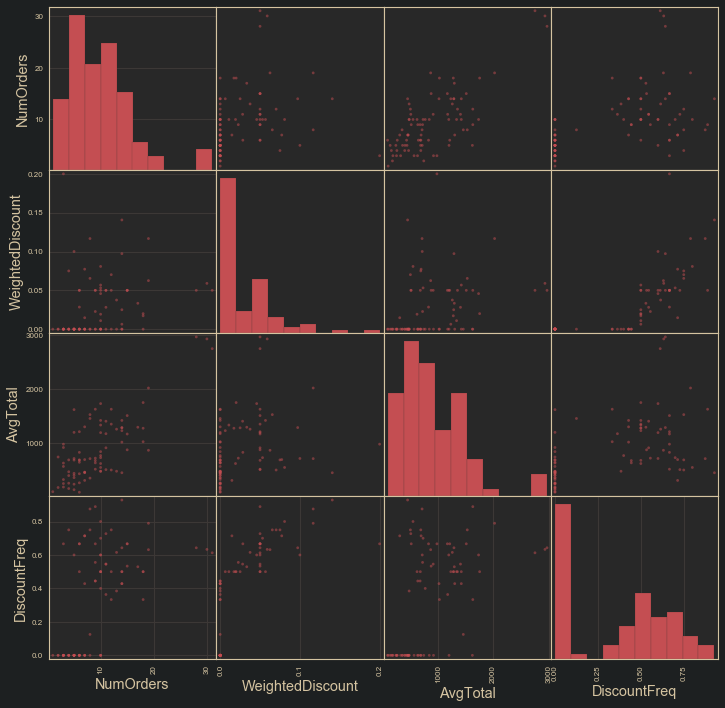

In [15]:
fig, ax = plt.subplots(1, figsize=(12,12))
pd.plotting.scatter_matrix(aggs, ax=ax);

Linear Regression for NumOrders~AvgTotal


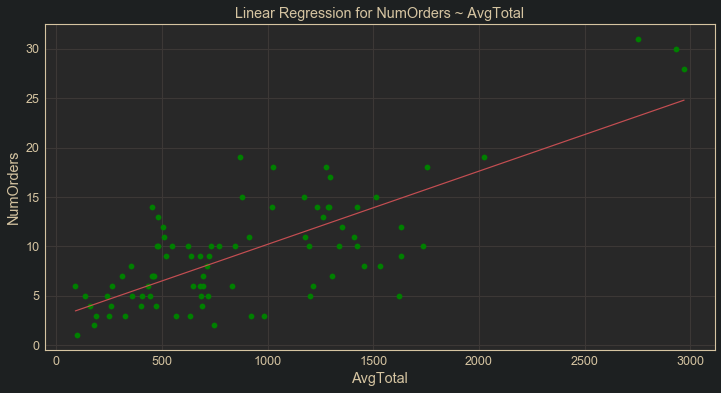

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              NumOrders   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     109.6
Date:                Thu, 16 Apr 2020   Prob (F-statistic):           7.69e-17
Time:                        15:06:22   Log-Likelihood:                -234.92
No. Observations:                  85   AIC:                             473.8
Df Residuals:                      83   BIC:                             478.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7956      0.760      3.677      0.000       1.283       4.308
AvgTotal       0.0074      0.001     10.470      0.000       0.006       0.009
==============================================================================
Omnibus:                        0.024   Durbin-Watson:                   2.218
Prob(Omnibus):                  0.988   Jarque-Bera (JB):                0.052
Skew:                           0.027   Prob(JB):                        0.974
Kurtosis:                       2.892   Cond. No.                     1.94e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Test for homoscedasticity of residuals:


,F_statistic,p_value
Goldfeld-Quandt,0.587527,0.94241


Normality Test Results for ['residuals']:
-------------------------------------------------------------------------------------------


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 residuals 
 Statistic 
 3.081057e-01 
 0.991073 
 
 
 p-value 
 1.159189e-07 
 0.833273 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 residuals 
 0.283685 
 0.754

Skew: 0.027428825067284505
Kurtosis: -0.10813297422857415


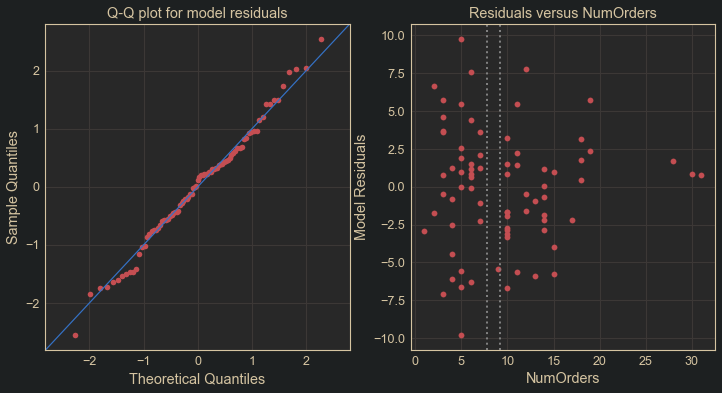

In [16]:
# We can see that there does not seem to be a linear relationship between DiscountFreq and
# the AvgTotal or NumOrders if the control group is ignored, meaning that the company does
# not seem to have a predictable reward system (ie, customers who spend/order more get more
# frequent/larger discounts) It does appear that, on average, customers who receive discounts
# at least some of the time as a group spend more and order more frequently on average than 
# those who do not. We can find the difference between these groups, and check for any linear
# relationships just to be sure. Since it was shown in the 'data_exploration' notebook that
# the 0.05 order discount was the best combination of profitability and buying incentive,
# it would be useful to know how often to offer this discount to get an effect in customer
# loyalty and enthusiasm.

# Companies tend to give discounts as rewards to better customers, so it makes sense that these
# discounted customers have better track records. But it is important to note that not all of
# the rewarded customers in the data, even some of the most rewarded, have track records that
# indicate their superiority over other non-discounted customers who had better records. The
# fact that rewarded customers tend to have better and more frequent orders is an average.
# This is reason to believe that the effect is bidirectional, as customers do tend to develop
# loyalty when rewarded, and become incentivized to spend more, and the company also becomes
# incentivized to reward more. Since the company does not seem to have a problem discounting
# less frequent and lower spending customers, it would be good to spread smaller discounts
# around to increase the chances of a customer responding positively to the rewards.

# It can also be seen that there appears to be a linear relationship between AvgTotal and 
# NumOrders, which means that those customers who buy more frequently also spend more money
# on each order. 
mf.do_a_linreg(aggs, 'AvgTotal', 'NumOrders');

In [17]:
# This is a solid regression from untransformed variables. The linear relationship certainly
# exists. Again, the relationship is not necessarily causal, since larger, more well-established
# customers would make larger and more frequent orders, and trying to increase the rate of 
# a customer's orders or the size of them would not guarantee that they would increase in the
# other measure. It also does not mean that this effect might not be had if some of the smaller
# customers actually had more to invest but need more incentive. For certain, trying to increase
# either of these metrics is good business, and it increasing one may help increase the other.
# Another piece of logic is that since these customers are resellers, if they are making a
# higher profit due to lower overhead costs due to customer loyalty discounts, they would
# be incentivized to continue sourcing from the company.

In [18]:
df.columns

Index(['Unnamed: 0', 'OrderID', 'OrderDate', 'RequiredDate', 'ItemCount',
       'OrderTotal', 'WeightedDiscount', 'CustomerId', 'CustomerCompany',
       'CustomerCity', 'CustomerRegion', 'CustomerCountry', 'ShipCity',
       'ShipRegion', 'ShipCountry', 'EmployeeId', 'EmployeeHireDate',
       'EmployeeCity', 'EmployeeRegion', 'EmployeeCountry', 'EmployeeSuper',
       'Discount', 'OrderTotalLog', 'ItemCountLog', 'OrderTotalSqrt',
       'ItemCountSqrt', 'OrderTotalCbrt', 'ItemCountCbrt', 'OrderTotal4rt',
       'ItemCount4rt', 'DiscountApplied'],
      dtype='object')

Variable: AvgTotal
Normality Test Results for ['AvgTotal']:
-------------------------------------------------------------------------------------------


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 AvgTotal 
 Statistic 
 1.0 
 0.890914 
 
 
 p-value 
 0.0 
 0.000003 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 AvgTotal 
 2.064751 
 0.754

count      85.000000
mean      894.418509
std       598.652272
min        90.750000
25%       464.000000
50%       716.720000
75%      1277.600000
max      2970.400000
Name: AvgTotal, dtype: float64

Skew: 1.325227207868294


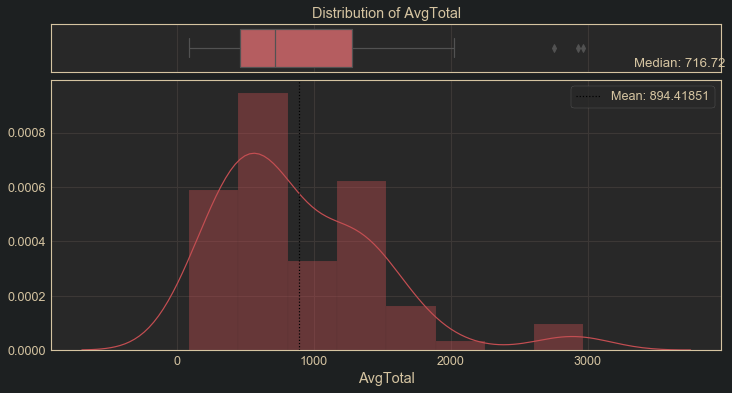

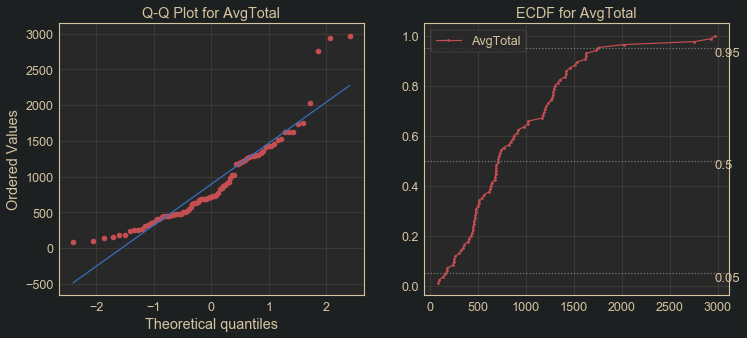

Variable: NumOrders
Normality Test Results for ['NumOrders']:
-------------------------------------------------------------------------------------------


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 NumOrders 
 Statistic 
 9.654852e-01 
 8.793390e-01 
 
 
 p-value 
 1.075291e-124 
 9.796321e-07 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 NumOrders 
 2.211152 
 0.754

count    85.000000
mean      9.423529
std       5.880510
min       1.000000
25%       5.000000
50%       9.000000
75%      12.000000
max      31.000000
Name: NumOrders, dtype: float64

Skew: 1.4864446267593345


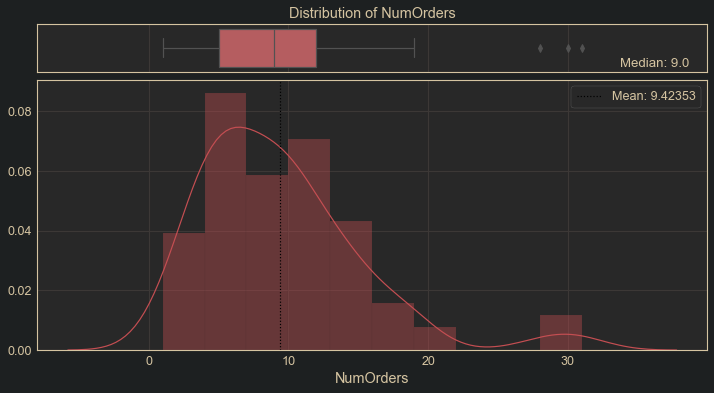

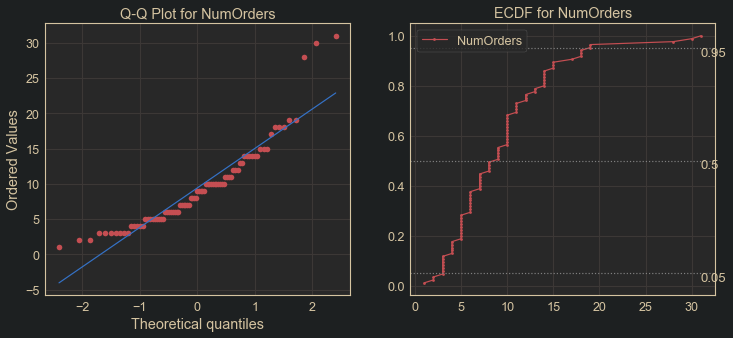

In [19]:
mf.visualize_distribution(aggs, ['AvgTotal', 'NumOrders'])

Linear Regression for AvgTotal~WeightedDiscount


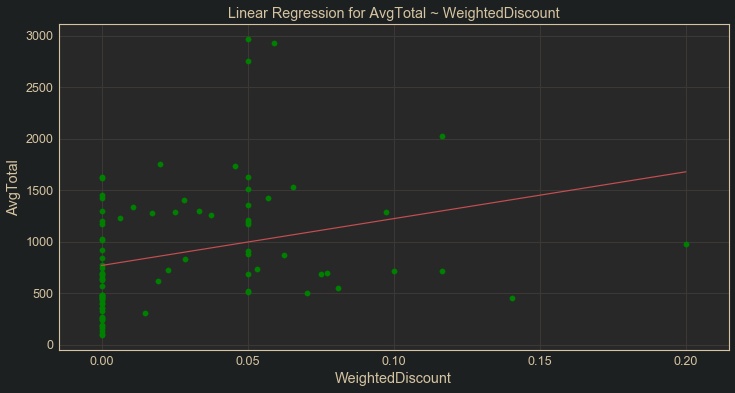

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               AvgTotal   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     7.776
Date:                Thu, 16 Apr 2020   Prob (F-statistic):            0.00656
Time:                        15:06:41   Log-Likelihood:                -659.85
No. Observations:                  85   AIC:                             1324.
Df Residuals:                      83   BIC:                             1329.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          769.6842     76.827     10.018      0.000     616.878     922.490
WeightedDiscount  4549.3902   1631.454      2.789      0.007    1304.495    7794.286
==============================================================================
Omnibus:                       24.462   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.876
Skew:                           1.252   Prob(JB):                     1.62e-08
Kurtosis:                       4.964   Cond. No.                         26.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Test for homoscedasticity of residuals:


,F_statistic,p_value
Goldfeld-Quandt,1.26853,0.239528


Normality Test Results for ['residuals']:
-------------------------------------------------------------------------------------------


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 residuals 
 Statistic 
 6.000000e-01 
 0.898715 
 
 
 p-value 
 8.617471e-30 
 0.000006 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 residuals 
 2.051971 
 0.754

Skew: 1.2523521676786906
Kurtosis: 1.963686699701336


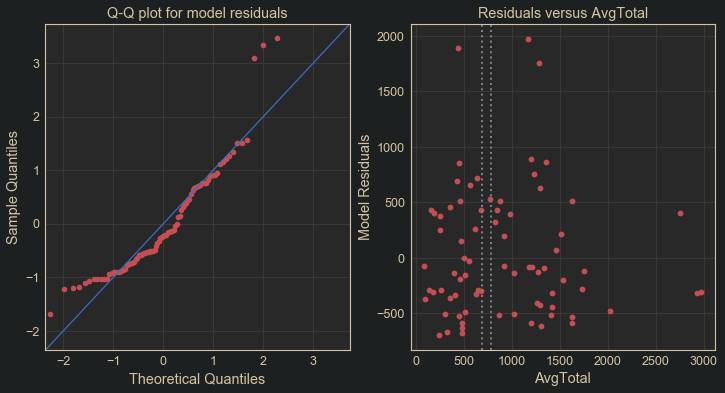

In [20]:
# We can see that without transforming the target variables, the linear regressions will be
# unreliable
mf.do_a_linreg(aggs, features='WeightedDiscount', target='AvgTotal')

<a id='transformation'></a>
### Transformation of target variables

Variable: AvgTotalCbrt
Normality Test Results for ['AvgTotalCbrt']:
-------------------------------------------------------------------------------------------


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 AvgTotalCbrt 
 Statistic 
 0.999997 
 0.985829 
 
 
 p-value 
 0.000000 
 0.480555 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 AvgTotalCbrt 
 0.378178 
 0.754

count    85.000000
mean      9.169682
std       2.122808
min       4.493819
25%       7.741753
50%       8.949179
75%      10.850880
max      14.374905
Name: AvgTotalCbrt, dtype: float64

Skew: 0.09549198122262556


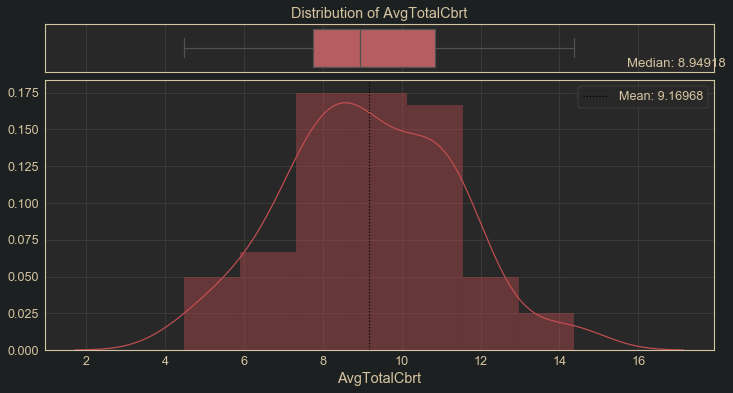

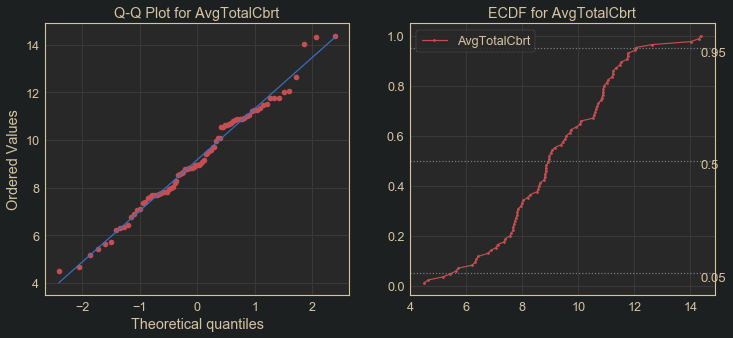

In [21]:
# A cube root transformation works very well for OrderTotal
aggs['AvgTotalCbrt'] = aggs.AvgTotal**(1/3)
mf.visualize_distribution(aggs, ['AvgTotalCbrt'])

Variable: NumOrdersCbrt
Normality Test Results for ['NumOrdersCbrt']:
-------------------------------------------------------------------------------------------


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 NumOrdersCbrt 
 Statistic 
 8.900899e-01 
 0.983683 
 
 
 p-value 
 6.472106e-82 
 0.359862 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 NumOrdersCbrt 
 0.419463 
 0.754

count    85.000000
mean      2.028682
std       0.419155
min       1.000000
25%       1.709976
50%       2.080084
75%       2.289428
max       3.141381
Name: NumOrdersCbrt, dtype: float64

Skew: 0.24458665531335824


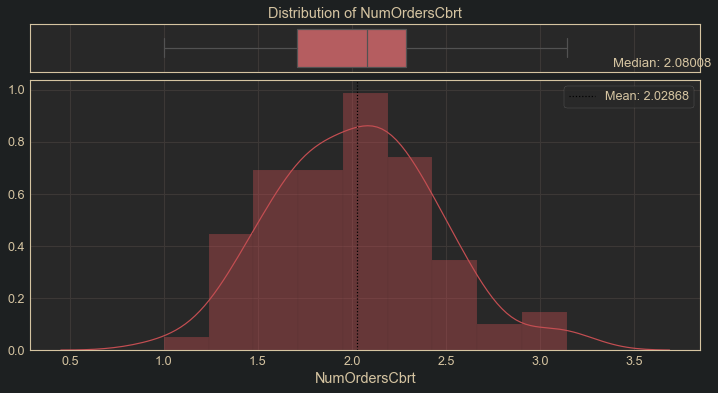

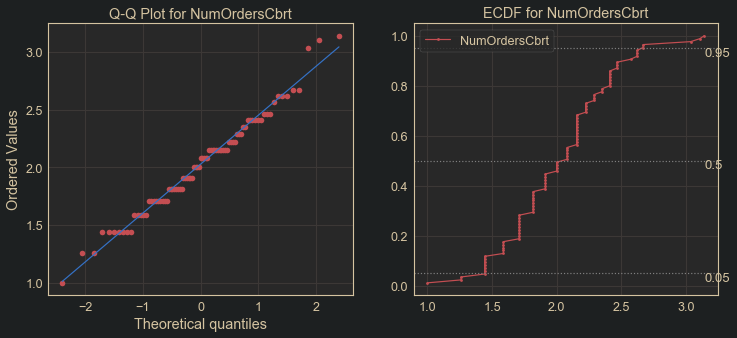

In [22]:
# The same transformation is ideal for NumOrders
aggs['NumOrdersCbrt'] = aggs.NumOrders**(1/3)
mf.visualize_distribution(aggs, ['NumOrdersCbrt'])

<a id='discount_orderfreq'></a>
## Effect of Discount on Customer Order Frequency

<a id='continuous1'></a>
### Testing as Continuous Variable
First I will run some regressions with the continuous WeightedDiscount variable to see if there are useful insights, and look for opportunities to create a categorical variable.

Linear Regression for NumOrdersCbrt~WeightedDiscount


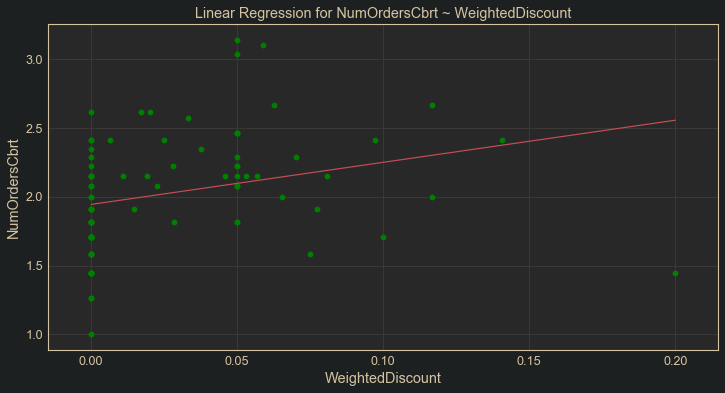

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          NumOrdersCbrt   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     7.154
Date:                Thu, 16 Apr 2020   Prob (F-statistic):            0.00901
Time:                        15:06:46   Log-Likelihood:                -42.684
No. Observations:                  85   AIC:                             89.37
Df Residuals:                      83   BIC:                             94.25
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.9446      0.054     36.027      0.000       1.837       2.052
WeightedDiscount     3.0659      1.146      2.675      0.009       0.786       5.346
==============================================================================
Omnibus:                        1.120   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.571   Jarque-Bera (JB):                0.576
Skew:                           0.069   Prob(JB):                        0.750
Kurtosis:                       3.379   Cond. No.                         26.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Test for homoscedasticity of residuals:


,F_statistic,p_value
Goldfeld-Quandt,0.638805,0.908188


Normality Test Results for ['residuals']:
-------------------------------------------------------------------------------------------


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 residuals 
 Statistic 
 0.237114 
 0.989462 
 
 
 p-value 
 0.000109 
 0.726535 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 residuals 
 0.283908 
 0.754

Skew: 0.06863750819749015
Kurtosis: 0.37917477974330893


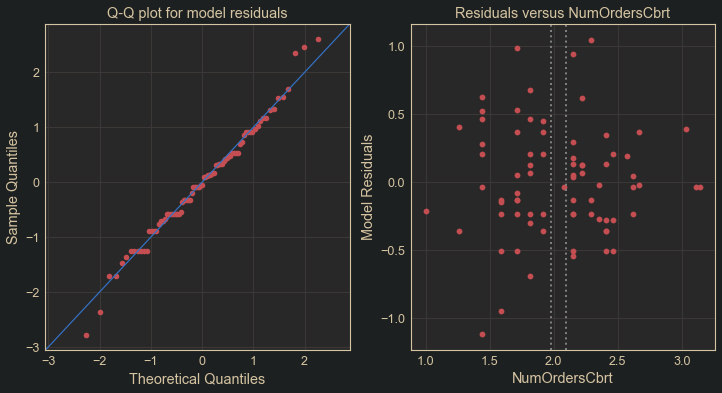

In [23]:
# Linear regression including customers who have gotten no discounts
mf.do_a_linreg(aggs, features='WeightedDiscount', target='NumOrdersCbrt');

In [24]:
# The null hypotheses of homoscedastic and normally distributed residuals is not rejected.
# We can see that the model shows a significant positive linear relationship between
# WeightedDiscount and NumOrdersCbrt when including the customers with an average order
# discount of zero.
# I now want to test to see if this linear relationship remains when excluding the undiscounted
# customers

Linear Regression for NumOrdersCbrt~WeightedDiscount


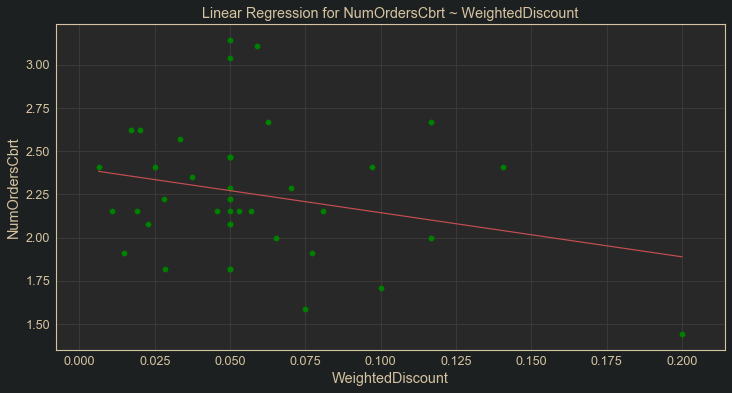

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          NumOrdersCbrt   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     2.734
Date:                Thu, 16 Apr 2020   Prob (F-statistic):              0.106
Time:                        15:06:48   Log-Likelihood:                -15.910
No. Observations:                  41   AIC:                             35.82
Df Residuals:                      39   BIC:                             39.25
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            2.3992      0.105     22.901      0.000       2.187       2.611
WeightedDiscount    -2.5547      1.545     -1.653      0.106      -5.680       0.571
==============================================================================
Omnibus:                        3.848   Durbin-Watson:                   2.431
Prob(Omnibus):                  0.146   Jarque-Bera (JB):                3.035
Skew:                           0.663   Prob(JB):                        0.219
Kurtosis:                       3.129   Cond. No.                         27.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Test for homoscedasticity of residuals:


,F_statistic,p_value
Goldfeld-Quandt,1.02836,0.477191


Normality Test Results for ['residuals']:
-------------------------------------------------------------------------------------------


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 residuals 
 Statistic 
 0.280823 
 0.951129 
 
 
 p-value 
 0.002366 
 0.076674 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 residuals 
 0.57553 
 0.727

Skew: 0.6633019902616459
Kurtosis: 0.1291789100385241


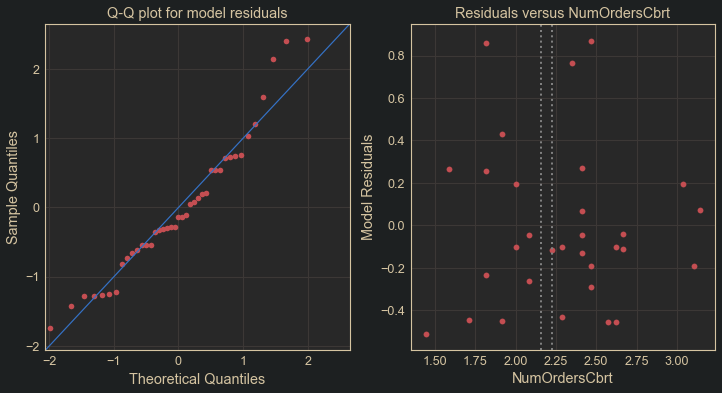

In [25]:
# Linear regression excluding customers who have gotten no discounts
mf.do_a_linreg(aggs[aggs.WeightedDiscount > 0], features='WeightedDiscount', target='NumOrdersCbrt');

In [26]:
# The null hypotheses of heteroscedastic and normally distributed residuals are not rejected
# After removing the undiscounted customers, we can see that the model is now suggesting a 
# negative linear relationship, but the confidence interval around the coefficient includes
# zero, meaning there could also be no linear relationship at all.
# This means that the relationship in the last model was most likely indicating a positive
# effect of non-zero discount amounts that does not maintain it's linearity when removing
# the undiscounted group. This is an indication that the customers should be viewed as either
# discounted or non-dicounted.

<a id='categorical1'></a>
### Testing as Categorical Variable
It seems that since there are few customers whose average discounts are any larger than 10%, and that about half of the customers have an average discount of zero, it would be useful to make comparisons between the group of customers who have been offered no discounts vs the group who have.

In [27]:
# Creating discount and no_discount categories
aggs['DiscountGroup'] = pd.cut(x = aggs.WeightedDiscount, 
                               bins = [-1, 0, 0.25],
                               labels = ['no_discount', 'discount'])

Showing stats for NumOrdersCbrt grouped by DiscountGroup


,Mean,Median,Std,Size
no_discount,1.818722,1.817121,0.346235,44
discount,2.254006,2.223980,0.373564,41


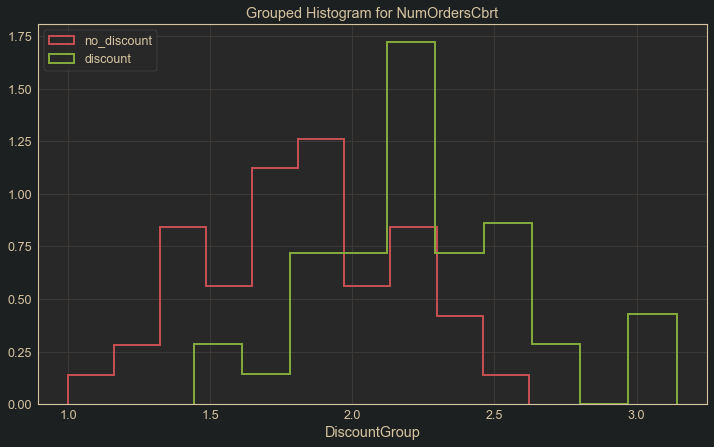

Grouping DataFrame by DiscountGroup
Target Features: NumOrdersCbrt


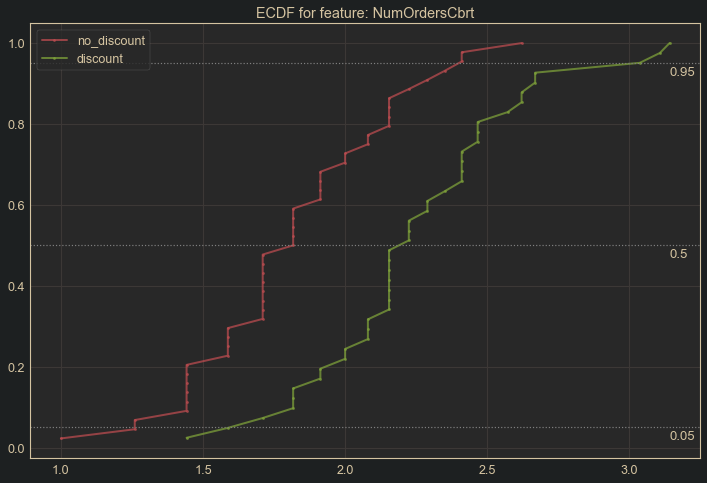

In [28]:
# Seeing how this grouping affects the Order Counts
mf.group_hist(aggs, feature='DiscountGroup', target='NumOrdersCbrt');
mf.ecdf(aggs, group_by='DiscountGroup', targets='NumOrdersCbrt');

In [29]:
# We can see that this has created two relatively equal sized groups, and that there appears
# to be a large effect size between them

#### Checking assumptions for modeling:

Variable: NumOrdersCbrt
Normality Test Results for ['NumOrdersCbrt']:
-------------------------------------------------------------------------------------------


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 NumOrdersCbrt 
 Statistic 
 8.734238e-01 
 0.984257 
 
 
 p-value 
 6.767833e-40 
 0.801758 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 NumOrdersCbrt 
 0.340099 
 0.73

count    44.000000
mean      1.818722
std       0.346235
min       1.000000
25%       1.587401
50%       1.817121
75%       2.080084
max       2.620741
Name: NumOrdersCbrt, dtype: float64

Skew: 0.09983675805792695


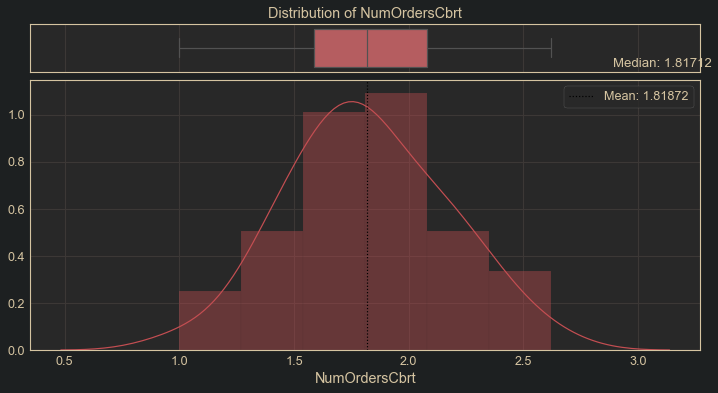

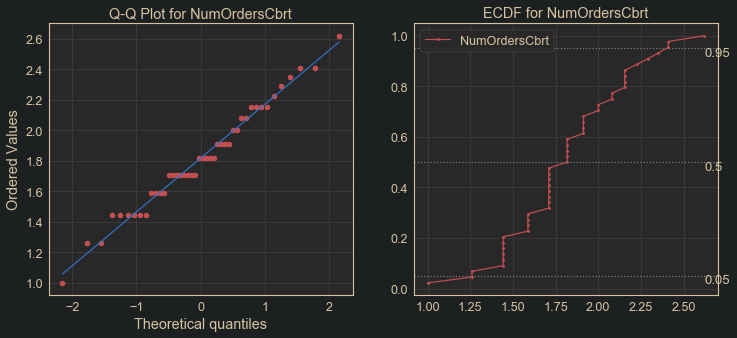

Variable: NumOrdersCbrt
Normality Test Results for ['NumOrdersCbrt']:
-------------------------------------------------------------------------------------------


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 NumOrdersCbrt 
 Statistic 
 9.253840e-01 
 0.971145 
 
 
 p-value 
 1.222271e-46 
 0.375485 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 NumOrdersCbrt 
 0.431399 
 0.727

count    41.000000
mean      2.254006
std       0.373564
min       1.442250
25%       2.080084
50%       2.223980
75%       2.466212
max       3.141381
Name: NumOrdersCbrt, dtype: float64

Skew: 0.3591788255511103


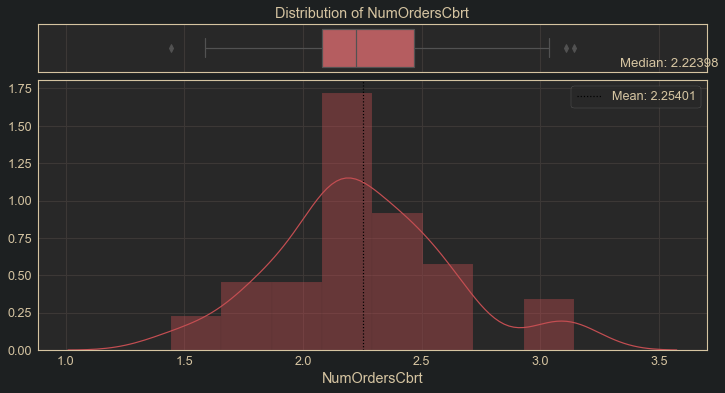

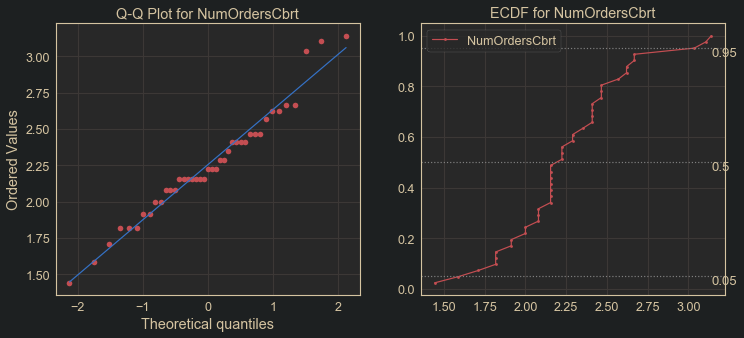

In [30]:
# Checking normality of groups
for name, group in aggs.groupby('DiscountGroup'):
    mf.visualize_distribution(group, ['NumOrdersCbrt'])

In [31]:
# We can see that assumptions of normality are not rejected for each group.
# Testing for homogeneous variance
group0 = aggs[aggs.DiscountGroup == 'no_discount'].NumOrdersCbrt
group1 = aggs[aggs.DiscountGroup == 'discount'].NumOrdersCbrt
print(stats.bartlett(group0,group1))
print(stats.levene(group0,group1))
print(stats.fligner(group0,group1))

BartlettResult(statistic=0.2365577353792687, pvalue=0.6267034295753482)
LeveneResult(statistic=0.02951658801527308, pvalue=0.864009878237106)
FlignerResult(statistic=0.02339816993310645, pvalue=0.8784261890279013)


In [32]:
# We can see that the three equality of variances tests have failed to reject the null
# hypothesis of equal variance between the groups. The Bartlett test is showing that it has
# the most power for normally distributed data. Speaking of normality assumptions, let's compare
# to a Fischer's F-test between the groups:
mf.f_test_groups(aggs, group_var='DiscountGroup', target='NumOrdersCbrt')

,no_discount,discount
discount,0.624053,NaN
no_discount,NaN,0.624053


In [33]:
# We can see that since there are just 2 groups, the Fischer F-test and the Bartlett test are
# nearly equivalent. Regardless, the assumption of equal variance is not rejected.

<a id='linreg1'></a>
#### Linear Regression

Linear Regression for NumOrdersCbrt~DiscountGroup


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          NumOrdersCbrt   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     31.09
Date:                Thu, 16 Apr 2020   Prob (F-statistic):           3.00e-07
Time:                        15:07:00   Log-Likelihood:                -32.678
No. Observations:                  85   AIC:                             69.36
Df Residuals:                      83   BIC:                             74.24
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     1.8187      0.054     33.542      0.000       1.711       1.927
DiscountGroup[T.discount]     0.4353      0.078      5.575      0.000       0.280       0.591
==============================================================================
Omnibus:                        1.151   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.562   Jarque-Bera (JB):                0.833
Skew:                           0.240   Prob(JB):                        0.659
Kurtosis:                       3.068   Cond. No.                         2.58
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Test for homoscedasticity of residuals:


,F_statistic,p_value
Goldfeld-Quandt,0.594594,0.938257


Normality Test Results for ['residuals']:
-------------------------------------------------------------------------------------------


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 residuals 
 Statistic 
 0.260509 
 0.984230 
 
 
 p-value 
 0.000014 
 0.388287 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 residuals 
 0.451194 
 0.754

Skew: 0.2400271369478677
Kurtosis: 0.06834570217044922


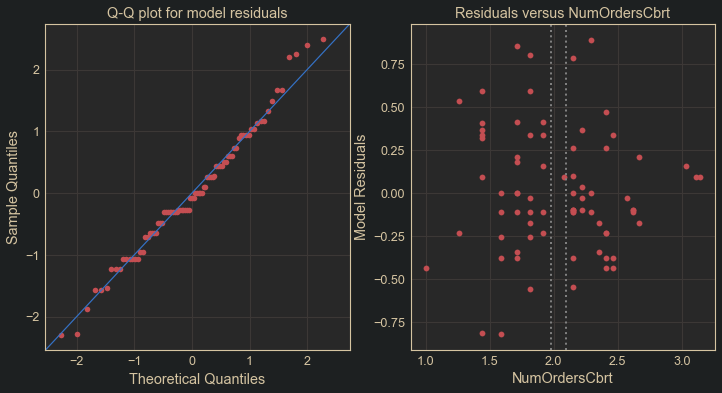

In [34]:
mf.do_a_linreg(aggs, features='DiscountGroup', target='NumOrdersCbrt');

In [35]:
# We can see that the assumptions of homoscedastic and normally distributed resid are not rejctd
# The model shows a statistically significant coefficient for the treatment group
# The R squared for this model is decently high considering there is just one variable with 
# two groups. The effect of a customer having an average discount above zero is becoming
# apparent

<a id='posthoc1'></a>
#### Post-hoc tests

t-tests

Testing DiscountGroup groups for statistically significant effects on NumOrdersCbrt


,discount
effect size,1.210250
p-val,0.000000
power,0.999807
size,41.000000


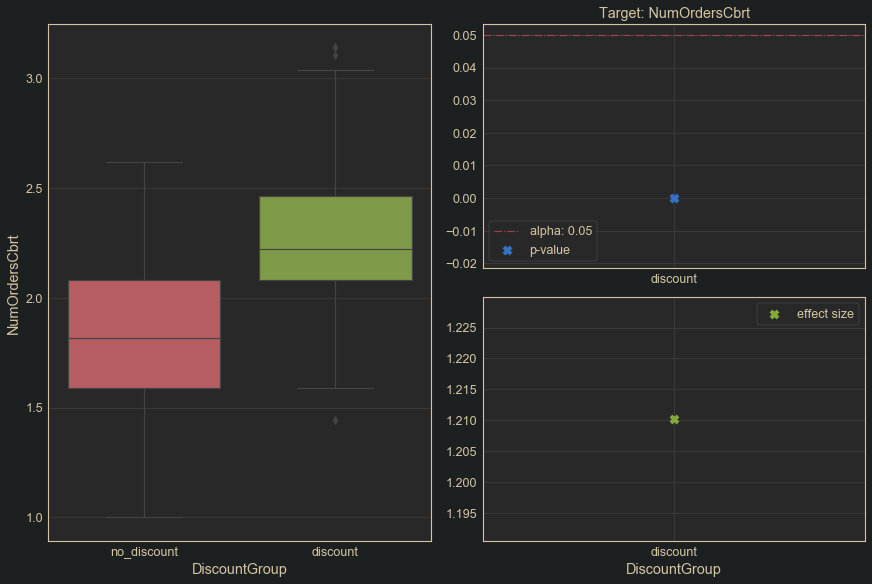

In [36]:
# Performing Welch's t-test on groups
mf.compare_groups(aggs, feature='DiscountGroup', targets=['NumOrdersCbrt'], control_group='no_discount')

We can see that the t-test confirms that not only is the effect of a customer having a non-zero average discount statistically significant, it is quite large. I will turn to Bayesian Estimation in order to determine how large one could expect this effect to be on average.

<a id='best1'></a>
### Bayesian Estimation

In [147]:
# Setting a vague prior based around mean of entire database
µ_prior = aggs.NumOrdersCbrt.mean()
σ_prior = aggs.NumOrdersCbrt.std(ddof=1) * 4
σ_low = 0
σ_high = 10

with pm.Model() as model:
    # Setting priors
    control_mean = pm.Normal('Control mean', mu=µ_prior, sd=σ_prior)
    discount_mean = pm.Normal('Discount mean', mu=µ_prior, sd=σ_prior)
    control_std = pm.Uniform('Control std', lower=σ_low, upper=σ_high)
    discount_std = pm.Uniform('Discount std', lower=σ_low, upper=σ_high)
    # Setting posteriors
    control = pm.Normal('Control Orders', 
                        mu=control_mean, 
                        sd=control_std, 
                        observed=aggs[aggs.DiscountGroup=='no_discount']['NumOrdersCbrt'])
    discount = pm.Normal('Discount Orders', 
                         mu=discount_mean, 
                         sd=discount_std,
                         observed=aggs[aggs.DiscountGroup=='discount']['NumOrdersCbrt'])
    # Mean differences
    control_means = pm.Deterministic('Control Means', control_mean)
    discount_means = pm.Deterministic('Discount Means', discount_mean)
    mean_diffs = pm.Deterministic('Mean Differences', discount_mean - control_mean)

In [148]:
with model:
    trace = pm.sample(2000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Discount std, Control std, Discount mean, Control mean]
Sampling 4 chains, 0 divergences: 100%|██████████| 12000/12000 [00:11<00:00, 1059.32draws/s]


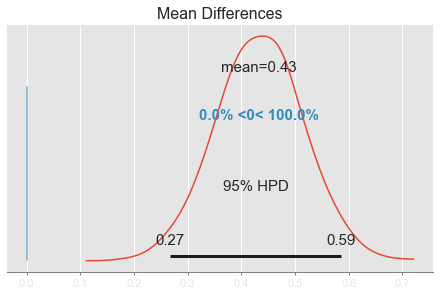

In [149]:
# Plotting the posterior of mean differences, we can see that the original null hypothesis
# of no effect is nearly impossible.
pm.plot_posterior(trace, var_names=['Mean Differences'], ref_val=0, credible_interval=0.95);

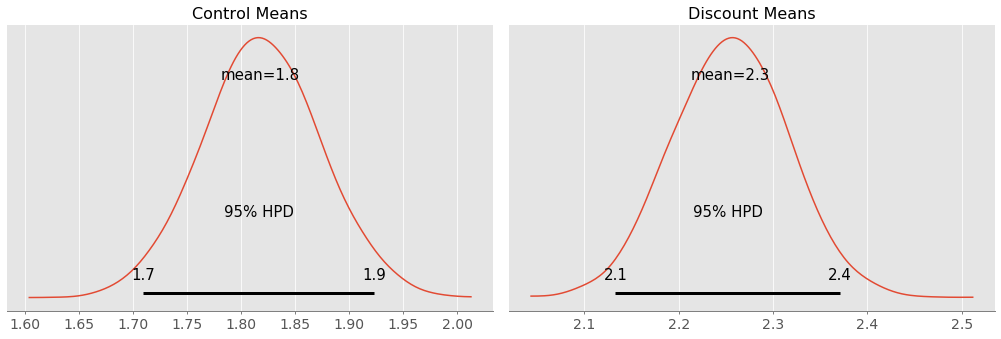

In [128]:
# Since our target is transformed, to find the real ratio of means from control to treatment,
# I will have to reverse-transform the means of the posteriors, then divide one by the other
pm.plot_posterior(trace, var_names=['Control Means', 'Discount Means'], credible_interval=0.95);

In [129]:
# A look at the trace summary
pm.summary(trace, var_names=['Control Means',
                             'Discount Means',
                             'Mean Differences'],
          credible_interval=0.95)

,mean,sd,hpd_2.5%,hpd_97.5%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
Control Means,1.818,0.055,1.709,1.923,0.001,0.000,9800.0,9797.0,9801.0,6158.0,1.0
Discount Means,2.254,0.061,2.133,2.371,0.001,0.000,10070.0,10059.0,10099.0,6202.0,1.0
Mean Differences,0.436,0.081,0.282,0.596,0.001,0.001,10421.0,9807.0,10452.0,6316.0,1.0


In [130]:
with model:
    model_control_mean = trace.get_values('Control Means').mean() ** 3
    model_discount_mean = trace.get_values('Discount Means').mean() ** 3

control_mean_measured = aggs[aggs.DiscountGroup == 'no_discount'].NumOrders.mean()
discount_mean_measured = aggs[aggs.DiscountGroup == 'discount'].NumOrders.mean()
discount_median_measured = aggs[aggs.DiscountGroup == 'discount'].NumOrders.median()
control_median_measured = aggs[aggs.DiscountGroup == 'no_discount'].NumOrders.median()
measured_median_ratio = discount_median_measured/control_median_measured
measured_mean_ratio = discount_mean_measured / control_mean_measured
model_mean_ratio = model_discount_mean / model_control_mean

print("Measured mean, median from untransformed Control group:")
print(control_mean_measured, control_median_measured)
print("Measured mean, median from untransformed Discount group:")
print(discount_mean_measured, discount_median_measured)
print("Ratio of measured means:")
print(measured_mean_ratio)
print("Ratio of measured medians:")
print(measured_median_ratio)
print("Model mean for Control group:")
print(model_control_mean)
print("Model mean for Discount group:")
print(model_discount_mean)
print("Ratio of model means:")
print(model_mean_ratio)

Measured mean, median from untransformed Control group:
6.659090909090909 6.0
Measured mean, median from untransformed Discount group:
12.390243902439025 11.0
Ratio of measured means:
1.8606509614584201
Ratio of measured medians:
1.8333333333333333
Model mean for Control group:
6.008952337972528
Model mean for Discount gorup:
11.452473603384124
Ratio of model means:
1.9059018875906557


Performing bootstrap simulation for parameter: median
Testing control group: no_discount
Testing control group: discount


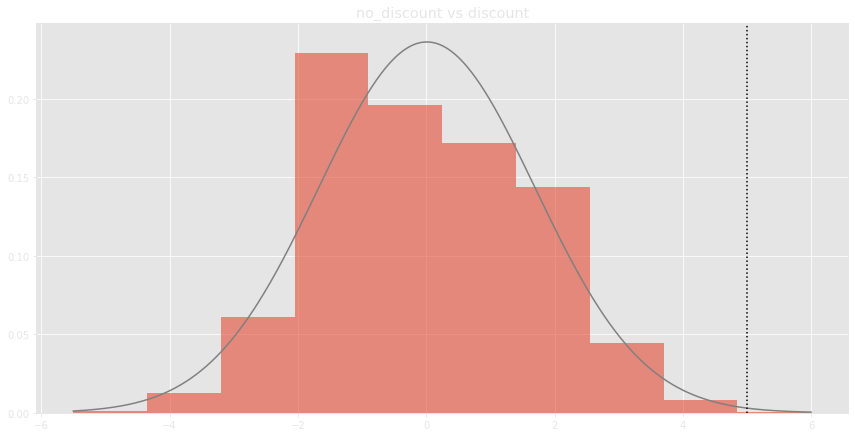

,discount
p_val to no_discount,0.0013


In [52]:
mf.bootstrap_sim(aggs, 'DiscountGroup', 'NumOrders', 
                 #control_groups='no_discount', 
                 param='median', show_hist=True)

In [54]:
sp.posthoc_dunn(aggs, val_col='NumOrders', group_col='DiscountGroup')

,discount,no_discount
discount,-1.000000,0.000001
no_discount,0.000001,-1.000000


#### Conclusion
The linear regressions and t-tests showed that a large and statistically significant difference was detected in the average number of orders placed by customers who had average order discounts of zero and those who did not. To determine the expected size of this effect, a Bayesian Estimation was performed.
The model shows that, based on the available data, one can expect customers with a non-zero average order discount to place 1.9 times as many orders than those customers who have an average order discount of zero.

<a id='discount_ordertotal'></a>
## Effect of Discount on Customer Avg Order Total

<a id='continuous2'></a>
### Tests on continuous variable

Linear Regression for AvgTotalCbrt~WeightedDiscount


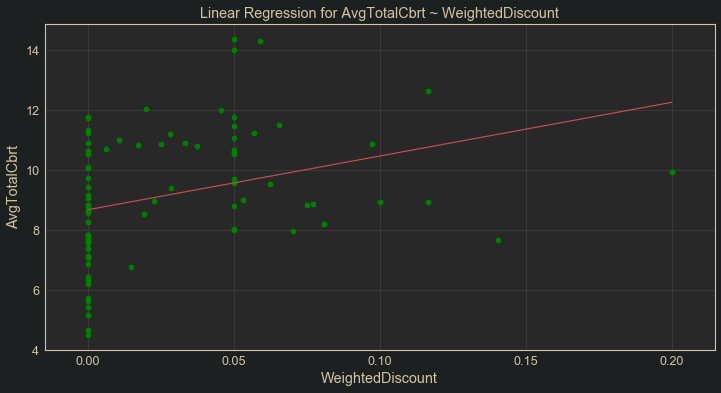

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AvgTotalCbrt   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     9.838
Date:                Thu, 16 Apr 2020   Prob (F-statistic):            0.00237
Time:                        15:51:29   Log-Likelihood:                -179.33
No. Observations:                  85   AIC:                             362.7
Df Residuals:                      83   BIC:                             367.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            8.6777      0.269     32.213      0.000       8.142       9.214
WeightedDiscount    17.9424      5.721      3.137      0.002       6.565      29.320
==============================================================================
Omnibus:                        1.116   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.572   Jarque-Bera (JB):                1.099
Skew:                           0.143   Prob(JB):                        0.577
Kurtosis:                       2.522   Cond. No.                         26.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Test for homoscedasticity of residuals:


,F_statistic,p_value
Goldfeld-Quandt,0.968793,0.537625


Normality Test Results for ['residuals']:
-------------------------------------------------------------------------------------------


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 residuals 
 Statistic 
 0.234984 
 0.985449 
 
 
 p-value 
 0.000130 
 0.457396 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 residuals 
 0.39229 
 0.754

Skew: 0.1428520462971841
Kurtosis: -0.47832753588385435


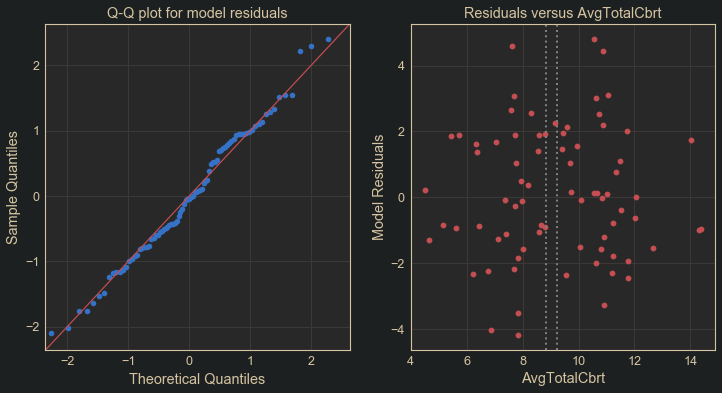

In [103]:
# Linear regression including customers with average discount of zero
mf.do_a_linreg(aggs, features='WeightedDiscount', target='AvgTotalCbrt');

In [104]:
# The null hypotheses of homoscedastic and normally distributed residuals are not rejected
# The model shows a significant positive linear relationsip when including customers with
# an average discount of zero. Let's see if this relationship still exists after removing
# this group

Linear Regression for AvgTotalCbrt~WeightedDiscount


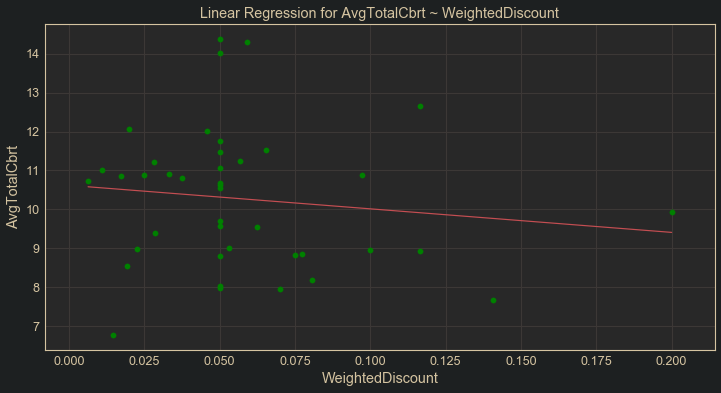

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AvgTotalCbrt   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.6428
Date:                Thu, 16 Apr 2020   Prob (F-statistic):              0.428
Time:                        15:51:31   Log-Likelihood:                -80.985
No. Observations:                  41   AIC:                             166.0
Df Residuals:                      39   BIC:                             169.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           10.6189      0.512     20.728      0.000       9.583      11.655
WeightedDiscount    -6.0575      7.556     -0.802      0.428     -21.340       9.225
==============================================================================
Omnibus:                        1.802   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.406   Jarque-Bera (JB):                1.233
Skew:                           0.424   Prob(JB):                        0.540
Kurtosis:                       3.065   Cond. No.                         27.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Test for homoscedasticity of residuals:


,F_statistic,p_value
Goldfeld-Quandt,0.840822,0.633512


Normality Test Results for ['residuals']:
-------------------------------------------------------------------------------------------


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 residuals 
 Statistic 
 0.201164 
 0.960855 
 
 
 p-value 
 0.062494 
 0.168498 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 residuals 
 0.548809 
 0.727

Skew: 0.4235379296940309
Kurtosis: 0.06483959039693055


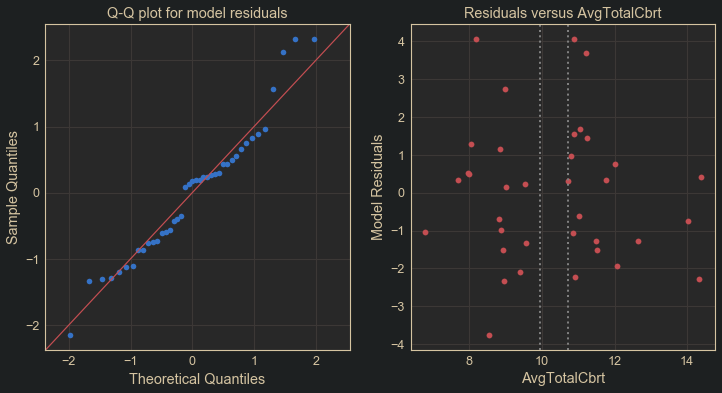

In [105]:
# Linear regression excluding non-discounted customers
mf.do_a_linreg(aggs[aggs.WeightedDiscount > 0], features='WeightedDiscount', target='AvgTotalCbrt');

In [106]:
# Again, we see the linear effect disappear when the 0.0 group is taken out, with a
# non-significant negative coefficient. This is an indication that although discounts have a 
# positive effect on the average order total for a customer, the effect is not improved by 
# offering higher discounts.

<a id='categorical2'></a>
### Tests on categorical variable

Showing stats for AvgTotalCbrt grouped by DiscountGroup


,Mean,Median,Std,Size
no_discount,8.140136,7.824836,1.898918,44
discount,10.274562,10.614691,1.780362,41


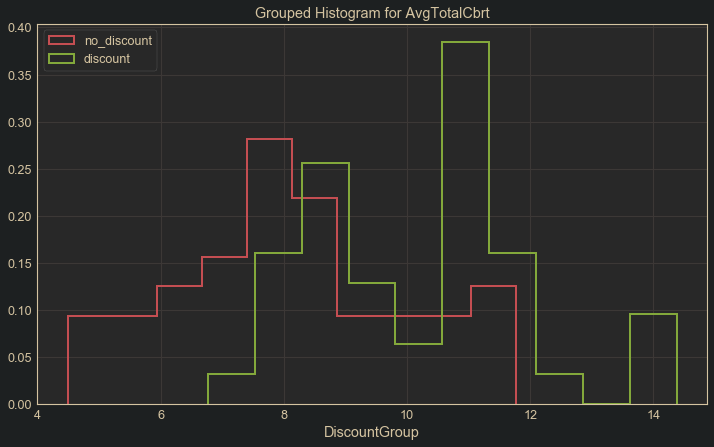

Grouping DataFrame by DiscountGroup
Target Features: AvgTotalCbrt


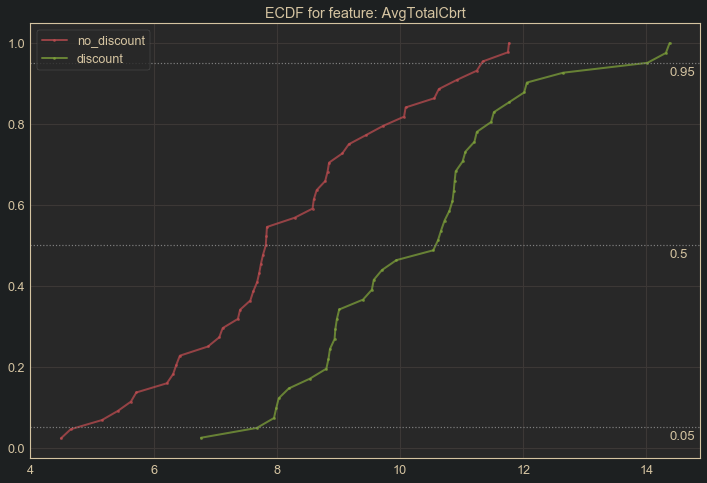

In [107]:
mf.group_hist(aggs, feature='DiscountGroup', target='AvgTotalCbrt');
mf.ecdf(aggs, group_by='DiscountGroup', targets='AvgTotalCbrt');

In [108]:
# We can see that there is a large difference between the two groups

#### Checking assumptions for modeling:

Variable: Data
Normality Test Results for ['Data']:
-------------------------------------------------------------------------------------------


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 Data 
 Statistic 
 9.999965e-01 
 0.977050 
 
 
 p-value 
 1.691755e-240 
 0.520006 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 Data 
 0.271446 
 0.73

count    44.000000
mean      8.140136
std       1.898918
min       4.493819
25%       7.019127
50%       7.824836
75%       9.238365
max      11.768334
Name: Data, dtype: float64

Skew: 0.1216661176490775


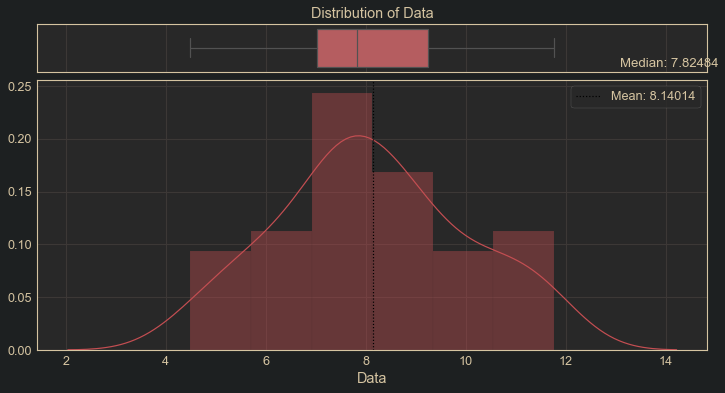

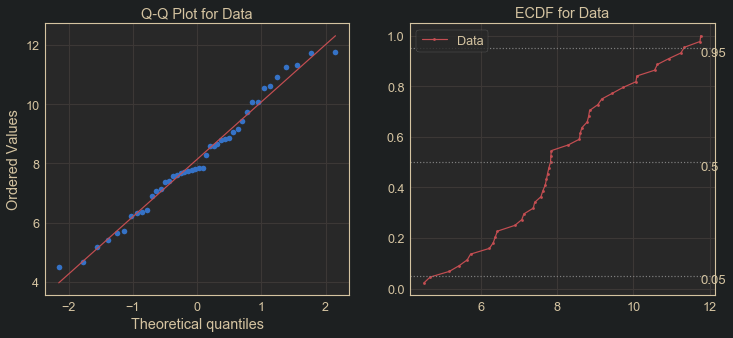

Variable: Data
Normality Test Results for ['Data']:
-------------------------------------------------------------------------------------------


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 Data 
 Statistic 
 1.0 
 0.962516 
 
 
 p-value 
 0.0 
 0.192502 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 Data 
 0.519432 
 0.727

count    41.000000
mean     10.274562
std       1.780362
min       6.767899
25%       8.936810
50%      10.614691
75%      11.206830
max      14.374905
Name: Data, dtype: float64

Skew: 0.4136711860484052


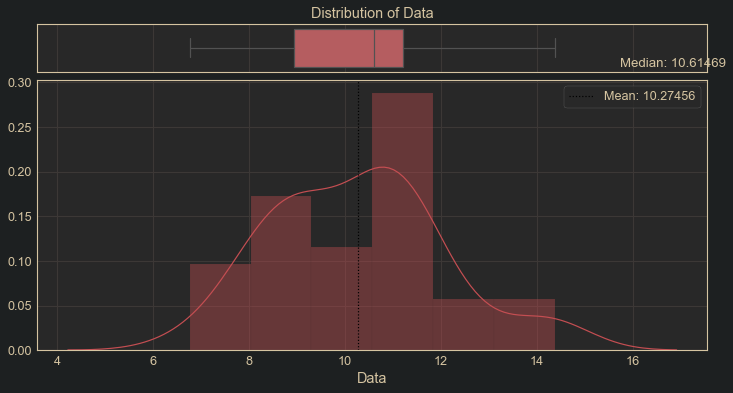

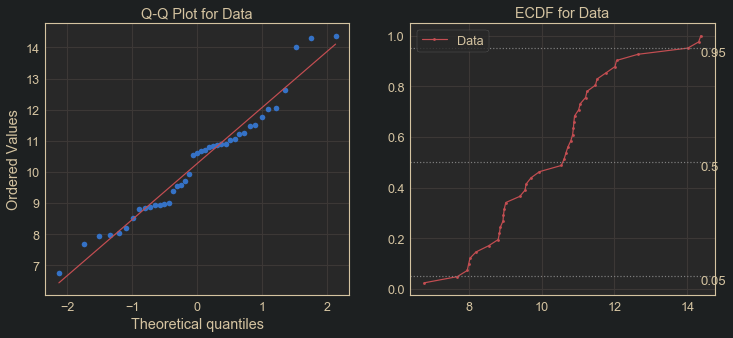

In [109]:
for name, group in aggs.groupby('DiscountGroup').AvgTotalCbrt:
    mf.visualize_distribution(group, 'AvgTotalCbrt')

In [101]:
# We can see that assumptions of normality are not rejected for each group.
# Testing for homogeneous variance
group0 = aggs[aggs.DiscountGroup == 'no_discount'].AvgTotalCbrt
group1 = aggs[aggs.DiscountGroup == 'discount'].AvgTotalCbrt
print(stats.bartlett(group0,group1))
print(stats.levene(group0,group1))
print(stats.fligner(group0,group1))

BartlettResult(statistic=0.16981524254689914, pvalue=0.6802760596729337)
LeveneResult(statistic=0.09532058264375269, pvalue=0.7582926870579065)
FlignerResult(statistic=0.1373912543594241, pvalue=0.7108883562170855)


<a id='linreg2'></a>
#### Linear Regression

Linear Regression for AvgTotalCbrt~DiscountGroup


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AvgTotalCbrt   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     28.47
Date:                Thu, 16 Apr 2020   Prob (F-statistic):           8.08e-07
Time:                        15:51:02   Log-Likelihood:                -171.55
No. Observations:                  85   AIC:                             347.1
Df Residuals:                      83   BIC:                             352.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     8.1401      0.278     29.302      0.000       7.588       8.693
DiscountGroup[T.discount]     2.1344      0.400      5.336      0.000       1.339       2.930
==============================================================================
Omnibus:                        1.378   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.502   Jarque-Bera (JB):                1.426
Skew:                           0.249   Prob(JB):                        0.490
Kurtosis:                       2.606   Cond. No.                         2.58
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Test for homoscedasticity of residuals:


,F_statistic,p_value
Goldfeld-Quandt,0.835288,0.703966


Normality Test Results for ['residuals']:
-------------------------------------------------------------------------------------------


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 residuals 
 Statistic 
 0.189876 
 0.982289 
 
 
 p-value 
 0.003707 
 0.294953 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 residuals 
 0.350347 
 0.754

Skew: 0.24871708451900326
Kurtosis: -0.3939573136614296


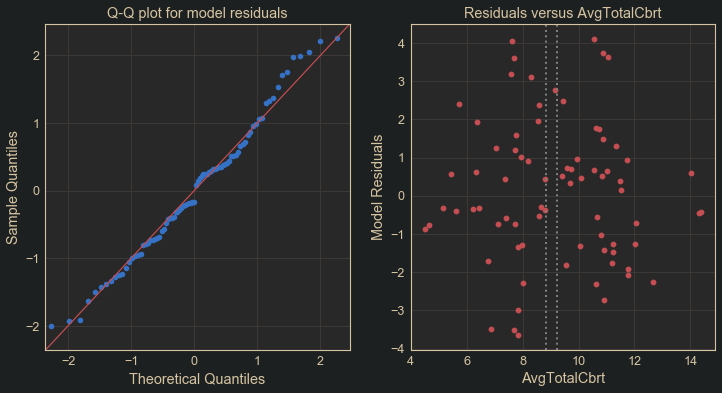

In [102]:
mf.do_a_linreg(aggs, 'DiscountGroup', 'AvgTotalCbrt');

In [ ]:
# We can see that the linear regression shows a significant coefficient, and the assumptions
# are not being rejected.

<a id='posthoc2'></a>
#### Post-hoc tests

t-tests

Testing DiscountGroup groups for statistically significant effects on AvgTotalCbrt


,discount
effect size,1.158292
p-val,0.000001
power,0.999539
size,41.000000


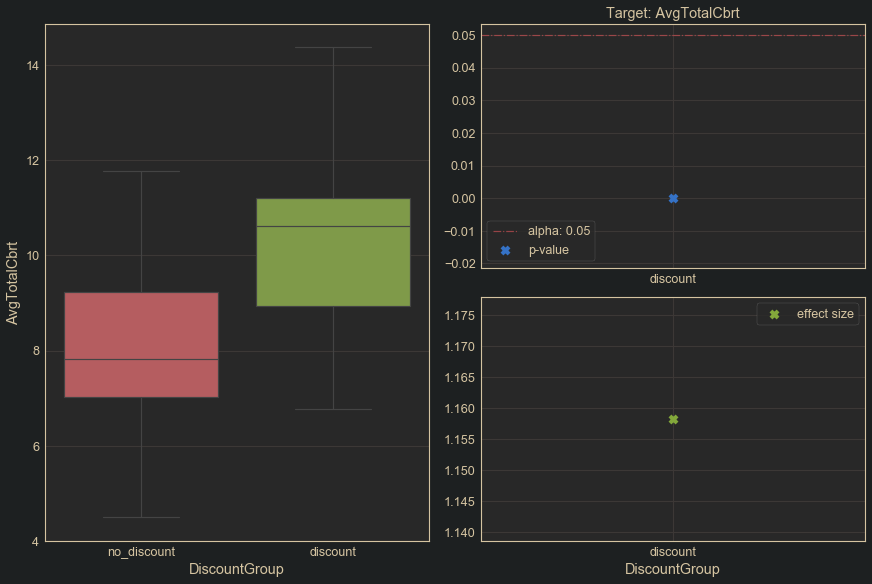

In [94]:
mf.compare_groups(aggs, feature='DiscountGroup', targets=['AvgTotalCbrt'], control_group='no_discount')

<a id='best2'></a>
### Bayesian Estimation

In [143]:
# Setting a vague prior based around mean of entire database
µ_prior = aggs.AvgTotalCbrt.mean()
σ_prior = aggs.AvgTotalCbrt.std(ddof=1) * 4
σ_low = 0
σ_high = 10

with pm.Model() as model:
    # Setting priors
    control_mean = pm.Normal('Control mean', mu=µ_prior, sd=σ_prior)
    discount_mean = pm.Normal('Discount mean', mu=µ_prior, sd=µ_prior)
    control_std = pm.Uniform('Control std', lower=σ_low, upper=σ_high)
    discount_std = pm.Uniform('Discount std', lower=σ_low, upper=σ_high)
    # Setting posteriors
    control = pm.Normal('Control Orders', 
                        mu=control_mean, 
                        sd=control_std, 
                        observed=aggs[aggs.DiscountGroup=='no_discount']['AvgTotalCbrt'])
    discount = pm.Normal('Discount Orders', 
                         mu=discount_mean, 
                         sd=discount_std,
                         observed=aggs[aggs.DiscountGroup=='discount']['AvgTotalCbrt'])
    # Mean differences
    control_means = pm.Deterministic('Control Means', control_mean)
    discount_means = pm.Deterministic('Discount Means', discount_mean)
    mean_diffs = pm.Deterministic('Mean Differences', discount_mean - control_mean)

In [144]:
with model:
    trace = pm.sample(2000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Discount std, Control std, Discount mean, Control mean]
Sampling 4 chains, 0 divergences: 100%|██████████| 12000/12000 [00:08<00:00, 1360.49draws/s]


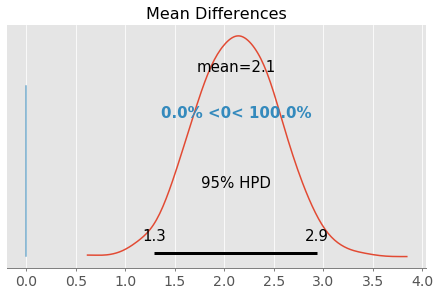

In [145]:
pm.plot_posterior(trace, var_names=['Mean Differences'], ref_val=0, credible_interval=0.95);

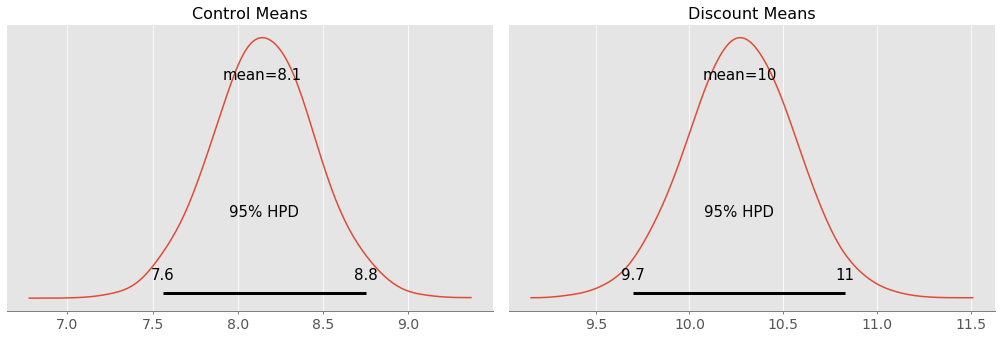

In [146]:
pm.plot_posterior(trace, var_names=['Control Means', 'Discount Means'], credible_interval=0.95);

In [147]:
pm.summary(trace, var_names=['Control Means',
                             'Discount Means',
                             'Mean Differences'],
          credible_interval=0.95)

,mean,sd,hpd_2.5%,hpd_97.5%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
Control Means,8.144,0.303,7.559,8.750,0.003,0.002,8640.0,8640.0,8679.0,5882.0,1.0
Discount Means,10.271,0.289,9.697,10.830,0.003,0.002,9657.0,9653.0,9693.0,6191.0,1.0
Mean Differences,2.127,0.426,1.293,2.935,0.004,0.003,9616.0,9375.0,9648.0,6436.0,1.0


In [149]:
with model:
    model_control_mean = trace.get_values('Control Means').mean() ** 3
    model_discount_mean = trace.get_values('Discount Means').mean() ** 3

control_mean_measured = aggs[aggs.DiscountGroup == 'no_discount'].AvgTotal.mean()
discount_mean_measured = aggs[aggs.DiscountGroup == 'discount'].AvgTotal.mean()
trans_control_mean = aggs[aggs.DiscountGroup == 'no_discount'].AvgTotalCbrt.mean() ** 3
trans_discount_mean = aggs[aggs.DiscountGroup == 'discount'].AvgTotalCbrt.mean() ** 3
trans_control_median = aggs[aggs.DiscountGroup == 'no_discount'].AvgTotalCbrt.median() ** 3
trans_discount_median = aggs[aggs.DiscountGroup == 'discount'].AvgTotalCbrt.median() ** 3
discount_median_measured = aggs[aggs.DiscountGroup == 'discount'].AvgTotal.median()
control_median_measured = aggs[aggs.DiscountGroup == 'no_discount'].AvgTotal.median()
measured_median_ratio = discount_median_measured/control_median_measured
measured_mean_ratio = discount_mean_measured / control_mean_measured
model_mean_ratio = model_discount_mean / model_control_mean

print("Measured mean, median from untransformed Control group:")
print(control_mean_measured, control_median_measured)
print("Measured mean, median from untransformed Discount group:")
print(discount_mean_measured, discount_median_measured)
print("Reverse transformed mean for Control group:")
print(trans_control_mean)
print("Reverse transformed mean for Discount group:")
print(trans_discount_mean)
print("Ratio of reverse transformed means:")
print(trans_discount_mean/trans_control_mean)
print("Reverse transformed median for Control group:")
print(trans_control_median)
print("Reverse transformed median for Discount group:")
print(trans_discount_median)
print("Ratio of reverse transformed medians:")
print(trans_discount_median/trans_control_median)
print("Ratio of measured means:")
print(measured_mean_ratio)
print("Ratio of measured medians:")
print(measured_median_ratio)
print("Model mean for Control group:")
print(model_control_mean)
print("Model mean for Discount gorup:")
print(model_discount_mean)
print("Ratio of model means:")
print(model_mean_ratio)

Measured mean, median from untransformed Control group:
626.240965909091 479.1
Measured mean, median from untransformed Discount group:
1182.2187987804878 1195.975
Reverse transformed mean for Control group:
539.3801478706712
Reverse transformed mean for Discount group:
1084.6507224797251
Ratio of reverse transformed means:
2.010920733292904
Reverse transformed median for Control group:
479.0994364428154
Reverse transformed median for Discount group:
1195.9749999999992
Ratio of reverse transformed medians:
2.4962980730676545
Ratio of measured means:
1.887801761841473
Ratio of measured medians:
2.496295136714673
Model mean for Control group:
540.2310516835985
Model mean for Discount gorup:
1083.5454790046997
Ratio of model means:
2.005707512790858


We can see that by reverse-transforming the means of the control and discount groups, the ratio between OrderTotals of the discount and control group is about 2:1, meaning that according to the model, customers who are offered discounts spend twice as much per order on average.

<a id='discountfreq_orderfreq'></a>
## Effect of Discount Frequency on Order Frequency

In [180]:
# First I would like to know the overall frequency of discount offerings, as well as
# the mean discount frequency among those customers who receive discounts
print("Total proportion of orders that were discounted:",
     len(df[df.DiscountApplied=='discount'])/len(df))
print("Mean of discount frequency for customers:", aggs.DiscountFreq.mean())
print("Mean of discount frequency for discounted customers:",
      aggs[aggs.DiscountFreq>0].DiscountFreq.mean())

Total proportion of orders that were discounted: 0.4581772784019975
Mean of discount frequency for customers: 0.35635792822526546
Mean of discount frequency for discounted customers: 0.5825081519066839


Linear Regression for NumOrdersCbrt~DiscountFreq


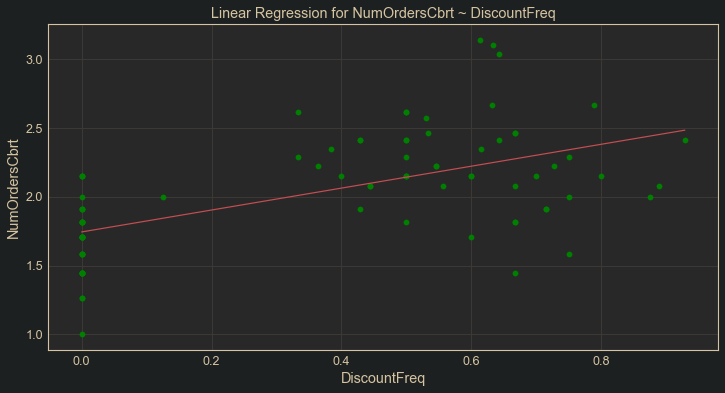

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          NumOrdersCbrt   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     44.47
Date:                Thu, 16 Apr 2020   Prob (F-statistic):           2.68e-09
Time:                        15:44:09   Log-Likelihood:                -27.964
No. Observations:                  85   AIC:                             59.93
Df Residuals:                      83   BIC:                             64.81
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.7443      0.056     30.928      0.000       1.632       1.856
DiscountFreq     0.7981      0.120      6.669      0.000       0.560       1.036
==============================================================================
Omnibus:                        1.143   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.565   Jarque-Bera (JB):                0.604
Skew:                           0.118   Prob(JB):                        0.740
Kurtosis:                       3.338   Cond. No.                         3.69
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Test for homoscedasticity of residuals:


,F_statistic,p_value
Goldfeld-Quandt,0.692728,0.862299


Normality Test Results for ['residuals']:
-------------------------------------------------------------------------------------------


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 residuals 
 Statistic 
 0.269471 
 0.986892 
 
 
 p-value 
 0.000006 
 0.548776 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 residuals 
 0.341621 
 0.754

Skew: 0.11817812064815725
Kurtosis: 0.3384395846841297


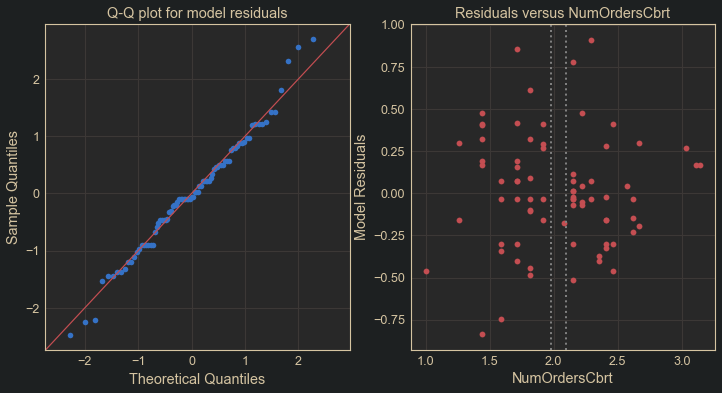

In [86]:
mf.do_a_linreg(aggs, features='DiscountFreq', target='NumOrdersCbrt');

Linear Regression for NumOrdersCbrt~DiscountFreq


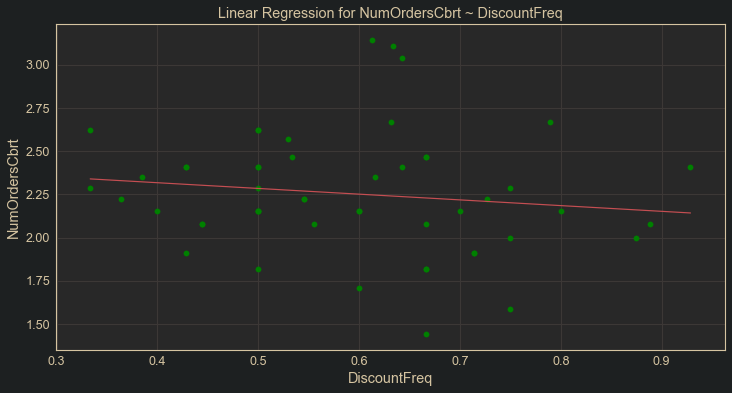

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          NumOrdersCbrt   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.9374
Date:                Thu, 16 Apr 2020   Prob (F-statistic):              0.338
Time:                        15:44:15   Log-Likelihood:                -17.156
No. Observations:                  51   AIC:                             38.31
Df Residuals:                      49   BIC:                             42.18
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.4498      0.208     11.774      0.000       2.032       2.868
DiscountFreq    -0.3312      0.342     -0.968      0.338      -1.019       0.356
==============================================================================
Omnibus:                        4.329   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.115   Jarque-Bera (JB):                3.245
Skew:                           0.488   Prob(JB):                        0.197
Kurtosis:                       3.759   Cond. No.                         9.58
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Test for homoscedasticity of residuals:


,F_statistic,p_value
Goldfeld-Quandt,1.07136,0.441686


Normality Test Results for ['residuals']:
-------------------------------------------------------------------------------------------


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 residuals 
 Statistic 
 0.270183 
 0.966441 
 
 
 p-value 
 0.000886 
 0.156823 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 residuals 
 0.555805 
 0.736

Skew: 0.4877276110390422
Kurtosis: 0.7585849756231697


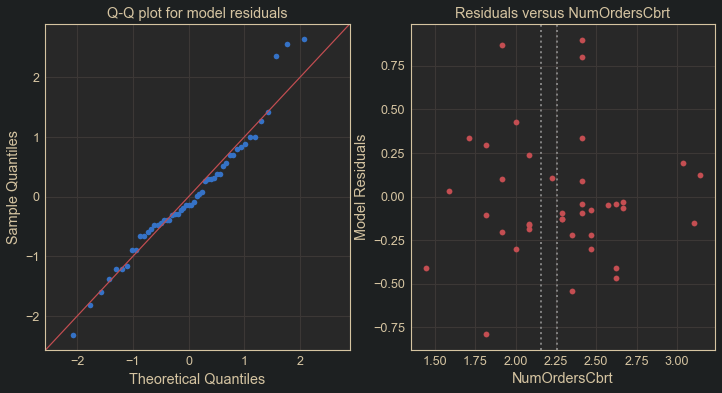

In [87]:
# We can see that the model is showing a significant coefficient with the non-discounted
# customers included, checking now for how this is affected when removing discounted
# customers. I expect the linear trend to disappear, based on the looks of the data
mf.do_a_linreg(aggs[aggs.DiscountFreq > .30],
               features='DiscountFreq',
               target='NumOrdersCbrt'
              );

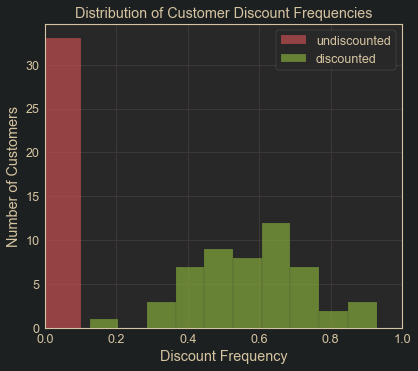

In [88]:
# As expected, the linear trend disappears. It will be more useful to break DiscountFreq
# into categories, to see if any particular frequency range is most effective at improving
# order frequency

# Checking distribution for binning edge ideas
fig, ax = plt.subplots()
aggs[aggs.DiscountFreq==0].DiscountFreq.hist(alpha=0.7, ax=ax, color='r', label='undiscounted')
aggs[aggs.DiscountFreq>0].DiscountFreq.hist(alpha=0.7, ax=ax, color='g', label='discounted')
ax.set_title('Distribution of Customer Discount Frequencies')
ax.set_xlim(left=0)
ax.set_xlabel('Discount Frequency')
ax.set_ylabel('Number of Customers')
ax.legend()
plt.show()

In [89]:
aggs['DiscountFreqGroup'] = pd.cut(x = aggs.DiscountFreq, 
                              bins = [-1, 0, 0.375, 0.625, 0.875, 1.0],
                              labels = [0, 0.25, 0.50, 0.75, 1.0])
aggs.head()

,NumOrders,WeightedDiscount,AvgTotal,DiscountFreq,AvgTotalCbrt,NumOrdersCbrt,DiscountGroup,DiscountFreqGroup
CustomerId,,,,,,,,
ALFKI,6,0.028431,830.150,0.666667,9.398362,1.817121,discount,0.75
ANATR,4,0.000000,399.875,0.000000,7.367295,1.587401,no_discount,0.00
AROUT,13,0.000000,480.000,0.384615,7.829735,2.351335,no_discount,0.50
BERGS,18,0.017213,1277.600,0.500000,10.850880,2.620741,discount,0.50
BLAUS,7,0.000000,464.000,0.000000,7.741753,1.912931,no_discount,0.00


Showing stats for NumOrdersCbrt grouped by DiscountFreqGroup


,Mean,Median,Std,Size
0.00,1.681529,1.709976,0.264004,33
0.25,2.283537,2.256704,0.256698,4
0.50,2.273380,2.223980,0.287422,26
0.75,2.210765,2.154435,0.438893,20
1.00,2.245113,2.245113,0.233387,2


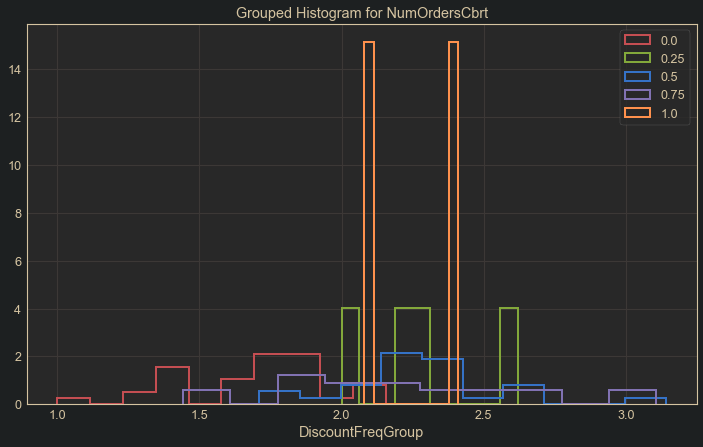

In [90]:
mf.group_hist(aggs, 'DiscountFreqGroup', 'NumOrdersCbrt');

In [91]:
# These binning edges are not ideal because some of the groups are too small. Trying again.
aggs['DiscountFreqGroup'] = pd.cut(x = aggs.DiscountFreq, 
                              bins = [-1, 
                                      0, 
                                      0.3,
                                      0.5, 
                                      0.7, 
                                      1.0
                                     ],
                              labels = ['none', 
                                        '0-30%',
                                        '30-50%', 
                                        '50-70%', 
                                        '>70%'
                                       ])
aggs.head()

,NumOrders,WeightedDiscount,AvgTotal,DiscountFreq,AvgTotalCbrt,NumOrdersCbrt,DiscountGroup,DiscountFreqGroup
CustomerId,,,,,,,,
ALFKI,6,0.028431,830.150,0.666667,9.398362,1.817121,discount,50-70%
ANATR,4,0.000000,399.875,0.000000,7.367295,1.587401,no_discount,none
AROUT,13,0.000000,480.000,0.384615,7.829735,2.351335,no_discount,30-50%
BERGS,18,0.017213,1277.600,0.500000,10.850880,2.620741,discount,30-50%
BLAUS,7,0.000000,464.000,0.000000,7.741753,1.912931,no_discount,none


Showing stats for NumOrdersCbrt grouped by DiscountFreqGroup


,Mean,Median,Std,Size
none,1.681529,1.709976,0.264004,33
0-30%,2.000000,2.000000,NaN,1
30-50%,2.271838,2.289428,0.225487,19
50-70%,2.311567,2.223980,0.443188,21
>70%,2.112703,2.080084,0.287203,11


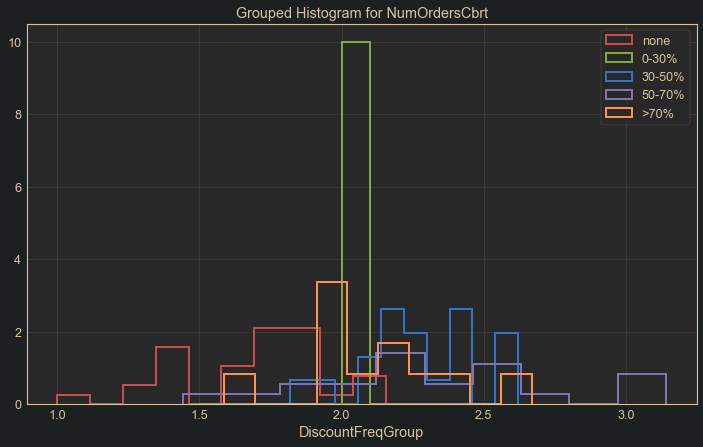

Grouping DataFrame by DiscountFreqGroup
Target Features: NumOrdersCbrt


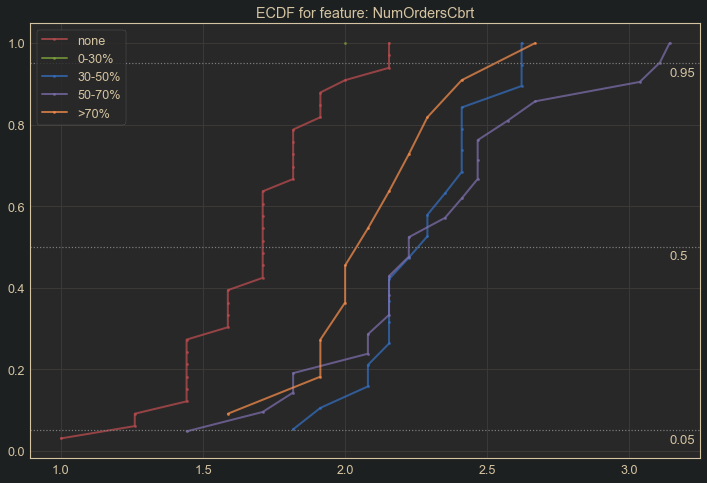

In [92]:
mf.group_hist(aggs, 'DiscountFreqGroup', 'NumOrdersCbrt');
mf.ecdf(aggs, 'DiscountFreqGroup', 'NumOrdersCbrt');

In [93]:
# It looks as though the largest effects are present in the low and medium groups
# More testing is needed. 
# It would be good to look at how many customers get less than .30 discount rate, since
# claiming that the whole bin represents anything lower than .30 with only one point that
# low is a bit generous.
aggs[aggs.DiscountFreq>0].DiscountFreq.sort_values().head()

CustomerId
EASTC    0.125000
SUPRD    0.333333
HILAA    0.333333
BLONP    0.363636
AROUT    0.384615
Name: DiscountFreq, dtype: float64

In [53]:
# As expected, only one customer has a value between 0 and .3, meaning it may be better to 
# report the low group as being from .30 to .50 since representation for anything less than
# .30 is scarce.

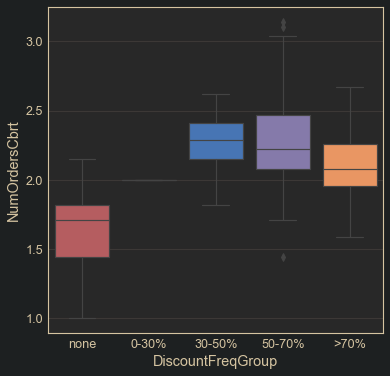

In [54]:
fig, ax = plt.subplots(figsize=(6,6))
sns.boxplot(data=aggs, x='DiscountFreqGroup', y='NumOrdersCbrt')

Variable: Data
Normality Test Results for ['Data']:
-------------------------------------------------------------------------------------------


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 Data 
 Statistic 
 8.658480e-01 
 0.961561 
 
 
 p-value 
 3.440837e-29 
 0.285955 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 Data 
 0.504889 
 0.717

count    33.000000
mean      1.681529
std       0.264004
min       1.000000
25%       1.442250
50%       1.709976
75%       1.817121
max       2.154435
Name: Data, dtype: float64

Skew: -0.26313463782324287


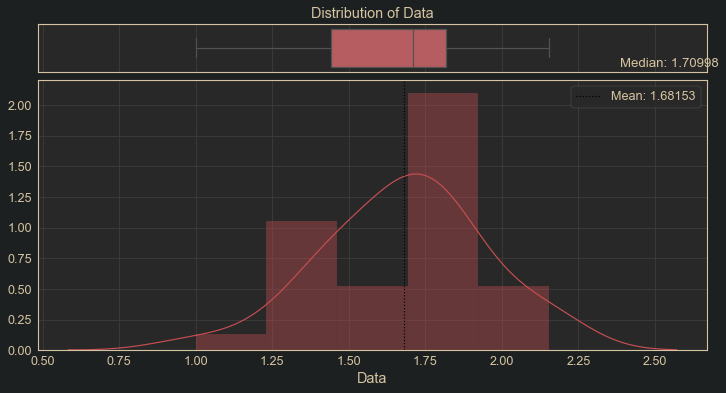

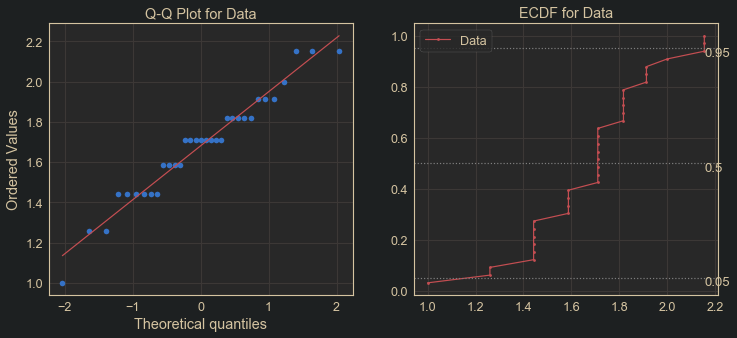

Variable: Data
Normality Test Results for ['Data']:
-------------------------------------------------------------------------------------------


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 Data 
 Statistic 
 9.654007e-01 
 0.952990 
 
 
 p-value 
 3.493936e-28 
 0.443578 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 Data 
 0.341645 
 0.69

count    19.000000
mean      2.271838
std       0.225487
min       1.817121
25%       2.154435
50%       2.289428
75%       2.410142
max       2.620741
Name: Data, dtype: float64

Skew: -0.11163140954543223


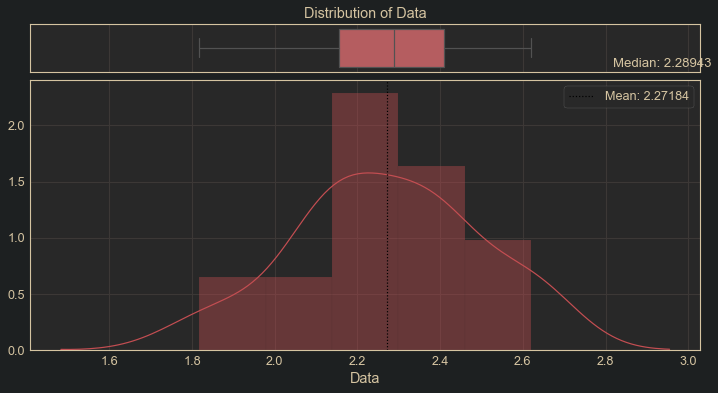

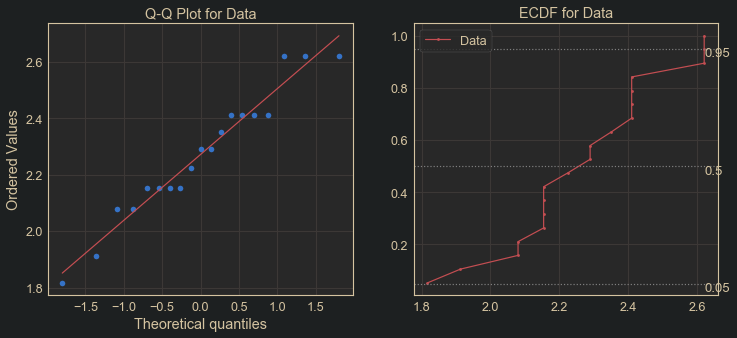

Variable: Data
Normality Test Results for ['Data']:
-------------------------------------------------------------------------------------------


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 Data 
 Statistic 
 9.253840e-01 
 0.961940 
 
 
 p-value 
 4.270712e-24 
 0.556033 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 Data 
 0.346256 
 0.694

count    21.000000
mean      2.311567
std       0.443188
min       1.442250
25%       2.080084
50%       2.223980
75%       2.466212
max       3.141381
Name: Data, dtype: float64

Skew: 0.22194061405648077


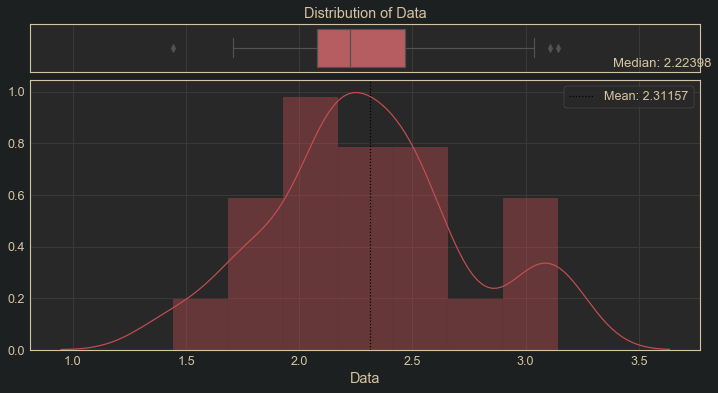

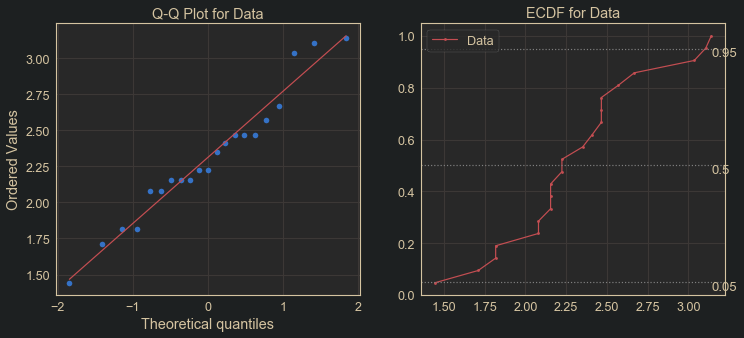

Variable: Data
Normality Test Results for ['Data']:
-------------------------------------------------------------------------------------------


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 Data 
 Statistic 
 9.437891e-01 
 0.978009 
 
 
 p-value 
 3.540444e-14 
 0.954078 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 Data 
 0.206286 
 0.68

count    11.000000
mean      2.112703
std       0.287203
min       1.587401
25%       1.956466
50%       2.080084
75%       2.256704
max       2.668402
Name: Data, dtype: float64

Skew: 0.18190723543922332


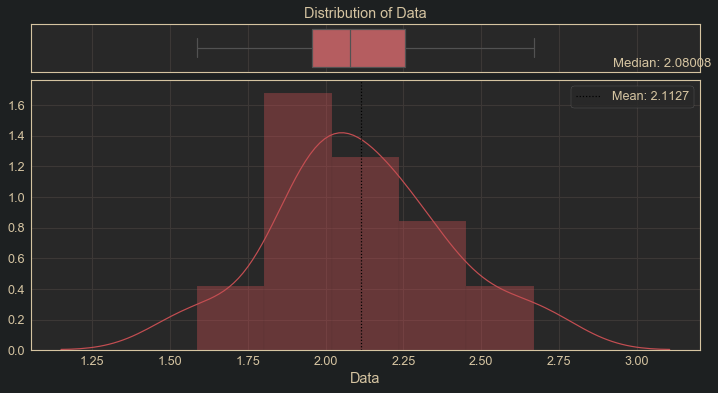

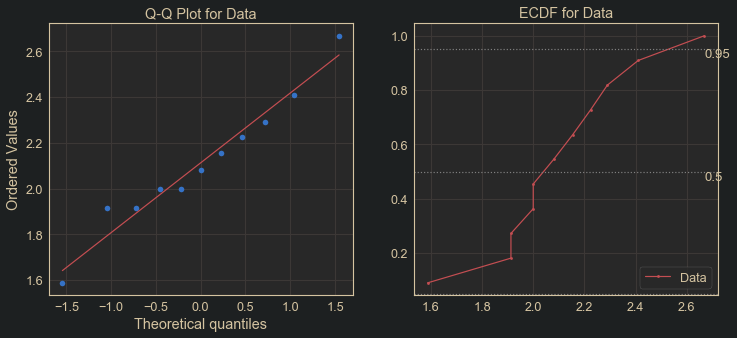

In [56]:
# Going to check normality for assumptions
for name, group in aggs.groupby('DiscountFreqGroup').NumOrdersCbrt:
    if len(group) > 1:
        mf.visualize_distribution(group, 'NumOrdersCbrt')

In [57]:
# Testing for equality of variance among groups
grp = {}
for name, group in aggs.groupby('DiscountFreqGroup').NumOrdersCbrt:
    grp[name] = group
stats.levene(grp['none'],grp['0-30%'],grp['30-50%'],grp['50-70%'],grp['>70%'])

LeveneResult(statistic=2.2416072821932445, pvalue=0.07181909193760486)

In [58]:
# We can see that the Levene test is nearly significant, meaning Welch's t-tests and ANOVA
# may be more appropriate

Linear Regression for NumOrdersCbrt~DiscountFreqGroup


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          NumOrdersCbrt   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     17.37
Date:                Thu, 16 Apr 2020   Prob (F-statistic):           2.71e-10
Time:                        15:17:43   Log-Likelihood:                -19.632
No. Observations:                  85   AIC:                             49.26
Df Residuals:                      80   BIC:                             61.48
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       1.6815      0.055     30.742      0.000       1.573       1.790
DiscountFreqGroup[T.0-30%]      0.3185      0.319      0.999      0.321      -0.316       0.953
DiscountFreqGroup[T.30-50%]     0.5903      0.090      6.523      0.000       0.410       0.770
DiscountFreqGroup[T.50-70%]     0.6300      0.088      7.183      0.000       0.455       0.805
DiscountFreqGroup[T.>70%]       0.4312      0.109      3.941      0.000       0.213       0.649
==============================================================================
Omnibus:                        2.604   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.272   Jarque-Bera (JB):                2.232
Skew:                           0.101   Prob(JB):                        0.328
Kurtosis:                       3.768   Cond. No.                         10.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Test for homoscedasticity of residuals:


,F_statistic,p_value
Goldfeld-Quandt,0.766241,0.776786


Normality Test Results for ['residuals']:
-------------------------------------------------------------------------------------------


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 residuals 
 Statistic 
 2.877975e-01 
 0.979627 
 
 
 p-value 
 9.986998e-07 
 0.198548 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 residuals 
 0.662281 
 0.754

Skew: 0.10099426760584578
Kurtosis: 0.7676576780629145


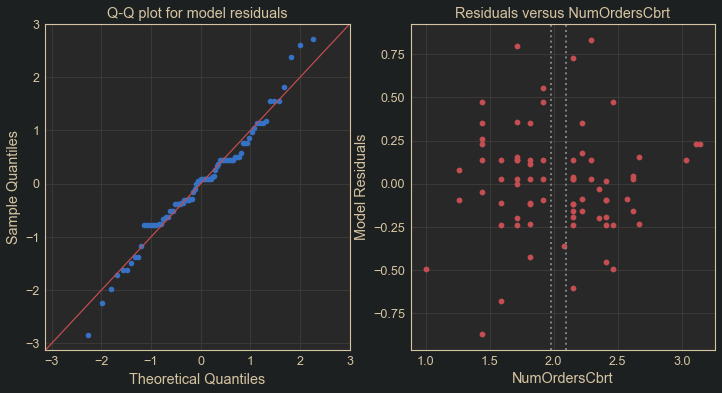

In [59]:
mf.do_a_linreg(aggs, 'DiscountFreqGroup', 'NumOrdersCbrt');

In [60]:
# We can see that the null hypotheses for homoscedastic/normal residuals are not rejected
# Each group has a significant coefficient, and the largest coefficient belongs to the medium
# group

Testing DiscountFreqGroup groups for statistically significant effects on NumOrdersCbrt


,0-30%,30-50%,50-70%,>70%
p-val,0.910789,0.000000,0.000009,0.001788
effect size,1.206312,2.353516,1.830733,1.598667
size,1.000000,19.000000,21.000000,11.000000
power,0.210761,1.000000,1.000000,0.994208


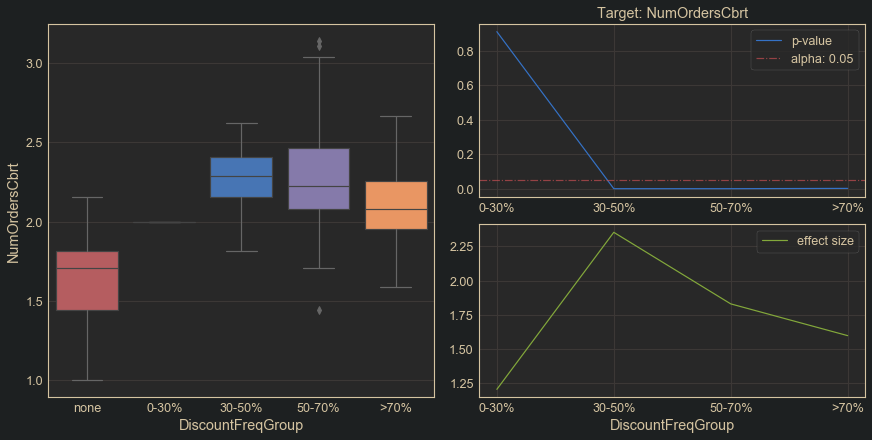

In [66]:
# Performing pairwise welch's t-tests:
mf.compare_groups(aggs, 'DiscountFreqGroup', 'NumOrdersCbrt', 'none', p_adjust=True, 
                  figsize=(12,6),
                  edgecolor=(.4,.4,.4))

In [62]:
# We can see that all treatment groups are significant, and there appears to be a downward
# trend in effect size, though this was determined to be a non-significant trend earlier
# Trend or no, it should be noted that all of the effect sizes are quite large, all over 1.6.

In [63]:
# Extending inquiry into determining if treatment groups are different from one another
# Starting with welch's t-tests
sp.posthoc_ttest(aggs,
                 val_col='NumOrders', 
                 group_col='DiscountFreqGroup',
                 equal_var=False,
                 #p_adjust='bonferroni',
                 ).round(6)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3367: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)


,none,0-30%,30-50%,50-70%,>70%
none,-1.000000,NaN,0.000000,0.000066,0.002739
0-30%,NaN,-1.0,NaN,NaN,NaN
30-50%,0.000000,NaN,-1.000000,0.399305,0.160058
50-70%,0.000066,NaN,0.399305,-1.000000,0.083676
>70%,0.002739,NaN,0.160058,0.083676,-1.000000


In [64]:
# Using a non-parametric post-hoc test on untransformed variable
sp.posthoc_dunn(aggs, 
                val_col='NumOrders', 
                group_col='DiscountFreqGroup',
                #p_adjust='bonferroni',
               ).round(6)

,0-30%,30-50%,50-70%,>70%,none
0-30%,-1.000000,0.439860,0.477125,0.739505,0.446091
30-50%,0.439860,-1.000000,0.837760,0.239961,0.000000
50-70%,0.477125,0.837760,-1.000000,0.306797,0.000000
>70%,0.739505,0.239961,0.306797,-1.000000,0.001287
none,0.446091,0.000000,0.000000,0.001287,-1.000000


In [65]:
# We can see in both the parametric and nonparametric tests that the treatment groups are not
# statistically different from one another. This was indicated by the non-significant linear
# relationship investigated earlier. This means that though the effect sizes for the groups
# seem to have a downward trend, this trend has not been confirmed by testing. What can be said
# is that increasing the rate of occurrence of offering a given customer a discount on their
# orders does not increase or decrease the number of orders that they make, as long as the 
# customer is offered a discount ever.

<a id='best3'></a>
### Bayesian Estimation

In [260]:
µ_prior = aggs.NumOrdersCbrt.mean()
σ_prior = aggs.NumOrdersCbrt.std(ddof=1) * 2
σ_low = 0
σ_high = 10

grp = {}
for name, group in aggs.groupby('DiscountFreqGroup')['NumOrdersCbrt']:
    grp[name] = group

with pm.Model() as model:
    control_mean = pm.Normal('control_mean', mu=µ_prior, sd=σ_prior)
    zero_to_thirty_mean = pm.Normal('zero_to_thirty_mean', mu=µ_prior, sd=σ_prior)
    thirty_to_fifty_mean = pm.Normal('thirty_to_fifty_mean', mu=µ_prior, sd=σ_prior)
    fifty_to_seventy_mean = pm.Normal('fifty_to_seventy_mean', mu=µ_prior, sd=σ_prior)
    over_seventy_mean = pm.Normal('over_seventy_mean', mu=µ_prior, sd=σ_prior)
    
    control_std = pm.Uniform('control_std', lower=σ_low, upper=σ_high)
    zero_to_thirty_std = pm.Uniform('zero_to_thirty_std', lower=σ_low, upper=σ_high)
    thirty_to_fifty_std = pm.Uniform('thirty_to_fifty_std', lower=σ_low, upper=σ_high)
    fifty_to_seventy_std = pm.Uniform('fifty_to_seventy_std', lower=σ_low, upper=σ_high)
    over_seventy_std = pm.Uniform('over_seventy_std', lower=σ_low, upper=σ_high)
    
    control = pm.Normal('control', mu=control_mean, sd=control_std, observed=grp['none'])
    zero_to_thirty = pm.Normal('zero_to_thirty',
                               mu=zero_to_thirty_mean,
                               sd=zero_to_thirty_std,
                               observed=grp['0-30%']
                              )
    thirty_to_fifty = pm.Normal('thirty_to_fifty',
                                mu=thirty_to_fifty_mean,
                                sd=thirty_to_fifty_std,
                                observed=grp['30-50%']
                               )
    fifty_to_seventy = pm.Normal('fifty_to_seventy',
                                 mu=fifty_to_seventy_mean,
                                 sd=fifty_to_seventy_std,
                                 observed=grp['50-70%']
                                )
    over_seventy = pm.Normal('over_seventy',
                             mu=over_seventy_mean,
                             sd=over_seventy_std,
                             observed=grp['>70%']
                            )

In [261]:
with model:
    trace = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [over_seventy_std, fifty_to_seventy_std, thirty_to_fifty_std, zero_to_thirty_std, control_std, over_seventy_mean, fifty_to_seventy_mean, thirty_to_fifty_mean, zero_to_thirty_mean, control_mean]
Sampling 4 chains, 595 divergences: 100%|██████████| 10000/10000 [00:14<00:00, 711.64draws/s]
There were 67 divergences after tuning. Increase `target_accept` or reparameterize.
There were 367 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7013255090030892, but should be close to 0.8. Try to increase the number of tuning steps.
There were 93 divergences after tuning. Increase `target_accept` or reparameterize.
There were 67 divergences after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.


In [265]:
means = pm.summary(trace, var_names=['control_mean',
                                     'zero_to_thirty_mean',
                                     'thirty_to_fifty_mean',
                                     'fifty_to_seventy_mean',
                                     'over_seventy_mean'
                                    ])['mean'] ** 3
means = pd.DataFrame(means)
means['ratio_to_control'] = means['mean'].map(lambda x: x / means.loc['control_mean','mean'])
means

,mean,ratio_to_control
control_mean,4.775582,1.000000
zero_to_thirty_mean,8.230173,1.723387
thirty_to_fifty_mean,11.712549,2.452591
fifty_to_seventy_mean,12.390535,2.594561
over_seventy_mean,9.420669,1.972675


<a id='discountfreq_avgtotal'></a>
## Effect of Discount Frequency on Average Order Total

Grouping DataFrame by DiscountFreqGroup
Target Features: AvgTotalCbrt


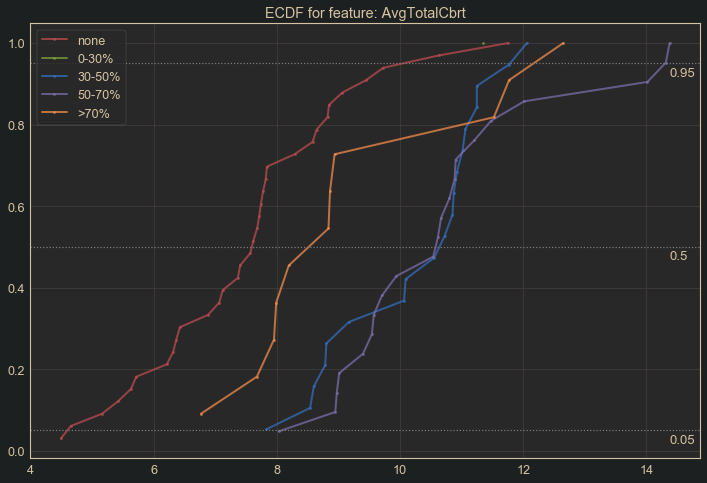

In [75]:
mf.ecdf(aggs, 'DiscountFreqGroup', 'AvgTotalCbrt');

Linear Regression for AvgTotalCbrt~DiscountFreq


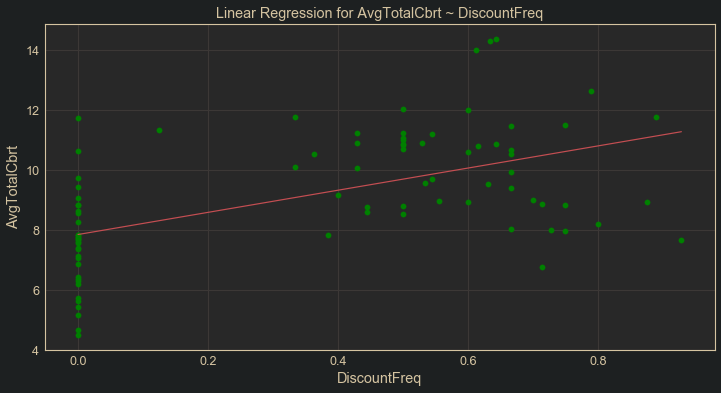

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AvgTotalCbrt   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     34.18
Date:                Thu, 16 Apr 2020   Prob (F-statistic):           9.58e-08
Time:                        15:27:30   Log-Likelihood:                -169.43
No. Observations:                  85   AIC:                             342.9
Df Residuals:                      83   BIC:                             347.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        7.8527      0.298     26.359      0.000       7.260       8.445
DiscountFreq     3.6957      0.632      5.846      0.000       2.438       4.953
==============================================================================
Omnibus:                        0.340   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.844   Jarque-Bera (JB):                0.460
Skew:                           0.136   Prob(JB):                        0.794
Kurtosis:                       2.764   Cond. No.                         3.69
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Test for homoscedasticity of residuals:


,F_statistic,p_value
Goldfeld-Quandt,0.916275,0.602746


Normality Test Results for ['residuals']:
-------------------------------------------------------------------------------------------


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 residuals 
 Statistic 
 0.170341 
 0.985746 
 
 
 p-value 
 0.012610 
 0.475409 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 residuals 
 0.260277 
 0.754

Skew: 0.13645850120507877
Kurtosis: -0.23566861776543702


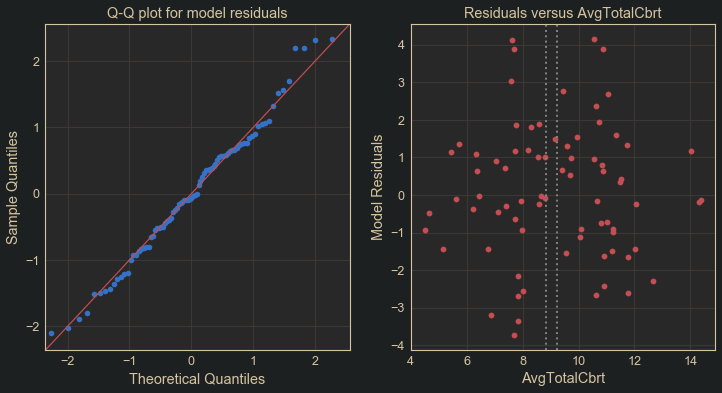

In [67]:
mf.do_a_linreg(aggs, 'DiscountFreq', 'AvgTotalCbrt');

Linear Regression for AvgTotalCbrt~DiscountFreq


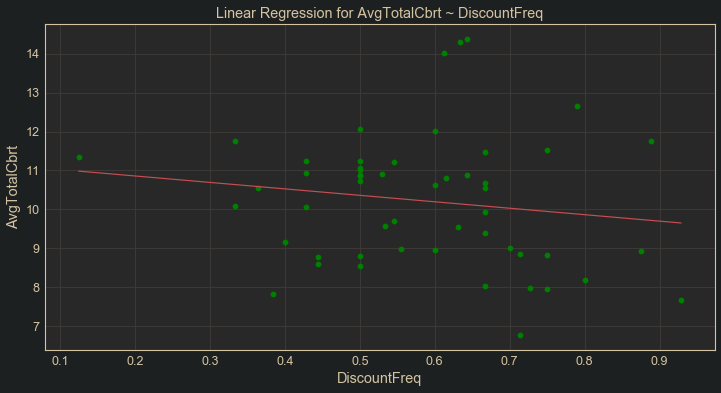

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AvgTotalCbrt   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.211
Date:                Thu, 16 Apr 2020   Prob (F-statistic):              0.276
Time:                        15:27:32   Log-Likelihood:                -99.603
No. Observations:                  52   AIC:                             203.2
Df Residuals:                      50   BIC:                             207.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       11.1905      0.909     12.312      0.000       9.365      13.016
DiscountFreq    -1.6598      1.508     -1.100      0.276      -4.690       1.370
==============================================================================
Omnibus:                        4.054   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.132   Jarque-Bera (JB):                3.168
Skew:                           0.587   Prob(JB):                        0.205
Kurtosis:                       3.290   Cond. No.                         8.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Test for homoscedasticity of residuals:


,F_statistic,p_value
Goldfeld-Quandt,1.14904,0.376596


Normality Test Results for ['residuals']:
-------------------------------------------------------------------------------------------


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 residuals 
 Statistic 
 0.173685 
 0.958119 
 
 
 p-value 
 0.076646 
 0.064874 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 residuals 
 0.62815 
 0.737

Skew: 0.5869118345618981
Kurtosis: 0.2902738953976982


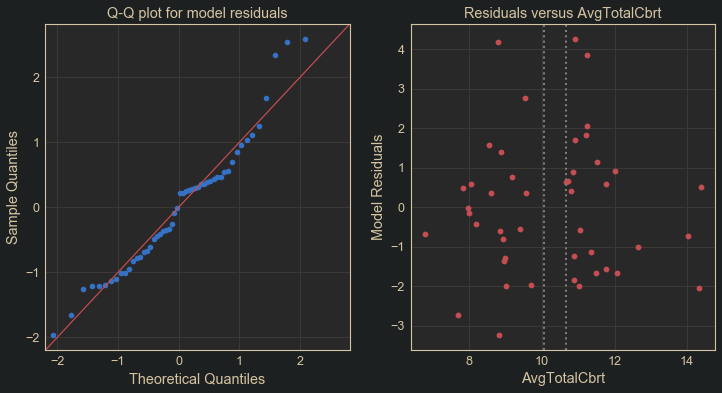

In [68]:
mf.do_a_linreg(aggs[aggs.DiscountFreq>0], 'DiscountFreq', 'AvgTotalCbrt');

Linear Regression for AvgTotalCbrt~DiscountFreqGroup


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AvgTotalCbrt   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     15.73
Date:                Thu, 16 Apr 2020   Prob (F-statistic):           1.55e-09
Time:                        15:27:32   Log-Likelihood:                -159.43
No. Observations:                  85   AIC:                             328.9
Df Residuals:                      80   BIC:                             341.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       7.5090      0.283     26.504      0.000       6.945       8.073
DiscountFreqGroup[T.0-30%]      3.8314      1.652      2.319      0.023       0.544       7.119
DiscountFreqGroup[T.30-50%]     2.7119      0.469      5.786      0.000       1.779       3.645
DiscountFreqGroup[T.50-70%]     3.2022      0.454      7.048      0.000       2.298       4.106
DiscountFreqGroup[T.>70%]       1.6871      0.567      2.977      0.004       0.559       2.815
==============================================================================
Omnibus:                        4.017   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.134   Jarque-Bera (JB):                3.670
Skew:                           0.509   Prob(JB):                        0.160
Kurtosis:                       3.025   Cond. No.                         10.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Test for homoscedasticity of residuals:


,F_statistic,p_value
Goldfeld-Quandt,0.873127,0.650868


Normality Test Results for ['residuals']:
-------------------------------------------------------------------------------------------


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 residuals 
 Statistic 
 0.183089 
 0.971806 
 
 
 p-value 
 0.005760 
 0.059238 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 residuals 
 0.634349 
 0.754

Skew: 0.5088503462520491
Kurtosis: 0.02531443505824349


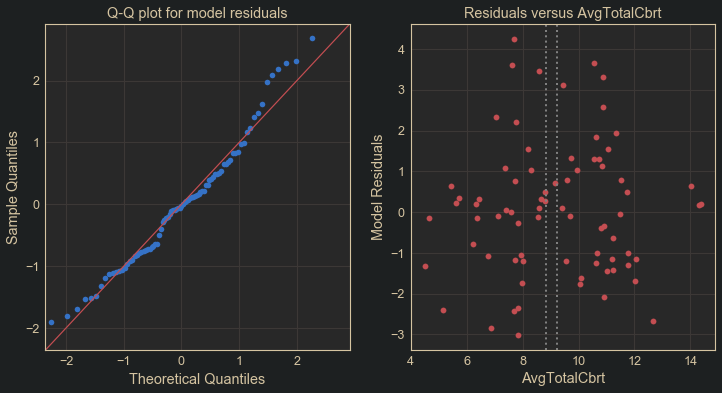

In [69]:
mf.do_a_linreg(aggs, 'DiscountFreqGroup', 'AvgTotalCbrt');

In [70]:
pi.parametric.welch_anova(aggs, dv='AvgTotalCbrt', between='DiscountFreqGroup')

,Source,ddof1,ddof2,F,p-unc
0,DiscountFreqGroup,4,52.883,15.289,2.274511e-08


In [71]:
grp = {}
for name, group in aggs.groupby('DiscountFreqGroup').AvgTotalCbrt:
    grp[name] = group
stats.kruskal(grp['none'],grp['low'],grp['med'],grp['high'])

KeyError: 'low'

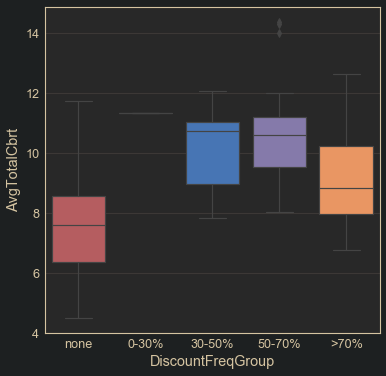

In [72]:
plt.figure(figsize=(6,6))
sns.boxplot(data=aggs, x='DiscountFreqGroup', y='AvgTotalCbrt')

Testing DiscountFreqGroup groups for statistically significant effects on AvgTotalCbrt


,0-30%,30-50%,50-70%,>70%
p-val,0.077709,0.000000,0.00000,0.075718
effect size,2.337228,1.801788,1.89707,0.988029
size,1.000000,19.000000,21.00000,11.000000
power,0.607652,1.000000,1.00000,0.791750


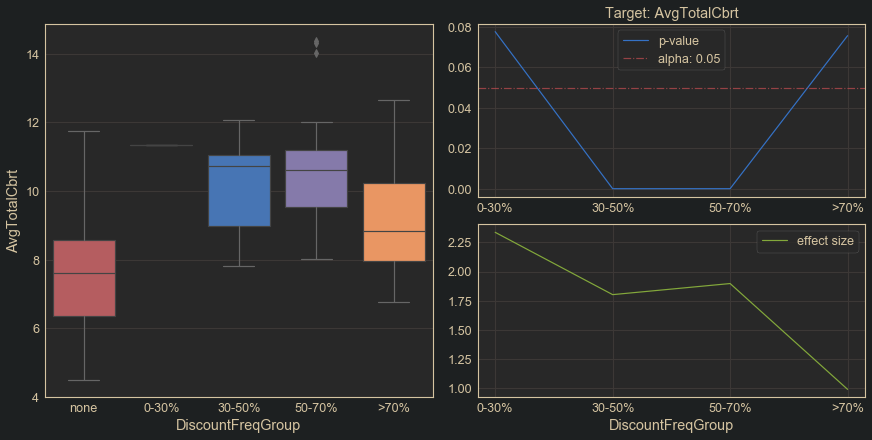

In [74]:
# Pairwise tests against control for comparisons
mf.compare_groups(aggs, 'DiscountFreqGroup', 'AvgTotalCbrt', 'none', 
                  p_adjust=True, figsize=(12,6), edgecolor=(.4,.4,.4))

In [273]:
# Testing all groups pairwise:
sp.posthoc_ttest(aggs, 
                 val_col='AvgTotalCbrt',
                 group_col='DiscountFreqGroup', 
                 equal_var=False).round(6)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3367: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)


,none,0-30%,30-50%,50-70%,>70%
none,-1.000000,NaN,0.000000,0.000000,0.018929
0-30%,NaN,-1.0,NaN,NaN,NaN
30-50%,0.000000,NaN,-1.000000,0.311157,0.131020
50-70%,0.000000,NaN,0.311157,-1.000000,0.041359
>70%,0.018929,NaN,0.131020,0.041359,-1.000000


In [274]:
# Using another test that applies a p_value adjustment
sp.posthoc_tamhane(aggs, val_col='AvgTotalCbrt', group_col='DiscountFreqGroup').round(6)

,none,0-30%,30-50%,50-70%,>70%
none,-1.000000,NaN,0.000000,0.000000,0.091131
0-30%,NaN,-1.0,NaN,NaN,NaN
30-50%,0.000000,NaN,-1.000000,0.844904,0.504495
50-70%,0.000000,NaN,0.844904,-1.000000,0.190384
>70%,0.091131,NaN,0.504495,0.190384,-1.000000


In [275]:
# Using non-parametric test on nontransformed variable for comparison
sp.posthoc_dunn(aggs, 
                val_col='AvgTotal',
                group_col='DiscountFreqGroup',
              ).round(6)

,0-30%,30-50%,50-70%,>70%,none
0-30%,-1.000000,0.500681,0.588511,0.230523,0.041656
30-50%,0.500681,-1.000000,0.664810,0.138387,0.000002
50-70%,0.588511,0.664810,-1.000000,0.060520,0.000000
>70%,0.230523,0.138387,0.060520,-1.000000,0.019201
none,0.041656,0.000002,0.000000,0.019201,-1.000000


In [276]:
# Bootstrap simulation for comparison
mf.bootstrap_sim(aggs, 'DiscountFreqGroup', 'AvgTotalCbrt')

Performing bootstrap simulation for parameter: mean
Testing control group: none
Testing control group: 0-30%
Testing control group: 30-50%
Testing control group: 50-70%
Testing control group: >70%



,0-30%,30-50%,50-70%,>70%
p_val to none,0.03545,0.00000,0.00000,0.00815
p_val to 0-30%,NaN,0.42395,0.65735,0.31790
p_val to 30-50%,NaN,NaN,0.30640,0.07850
p_val to 50-70%,NaN,NaN,NaN,0.02890


In [277]:
# Perform bootstrap with median of nontransformed data:
mf.bootstrap_sim(aggs, 'DiscountFreqGroup', 'AvgTotal', param='median')

Performing bootstrap simulation for parameter: median
Testing control group: none
Testing control group: 0-30%
Testing control group: 30-50%
Testing control group: 50-70%
Testing control group: >70%



,0-30%,30-50%,50-70%,>70%
p_val to none,0.04425,0.0003,0.00035,0.02435
p_val to 0-30%,NaN,0.5515,0.59550,0.32330
p_val to 30-50%,NaN,NaN,0.76655,0.16930
p_val to 50-70%,NaN,NaN,NaN,0.07640


In [211]:
# We can see that the treatment groups do not seem to be statistically different from one
# another, except in the case of high vs med groups, where they are close (without p_adjust)
# What we know is likely is that increasing the frequency of discount offers does not positively
# affect the customer's average order totals, once the customer has been offered discounts at
# any rate at all. This shows that the company just needs to offer discounts to the customer
# more than none of the time, but less than half the time, in order to get desired effects on
# customer behavior.

<a id='best4'></a>
### Bayesian Estimation

In [278]:
µ_prior = aggs.AvgTotalCbrt.mean()
σ_prior = aggs.AvgTotalCbrt.std(ddof=1) * 2
σ_low = 0
σ_high = 10

grp = {}
for name, group in aggs.groupby('DiscountFreqGroup')['AvgTotalCbrt']:
    grp[name] = group

with pm.Model() as model:
    control_mean = pm.Normal('control_mean', mu=µ_prior, sd=σ_prior)
    zero_to_thirty_mean = pm.Normal('zero_to_thirty_mean', mu=µ_prior, sd=σ_prior)
    thirty_to_fifty_mean = pm.Normal('thirty_to_fifty_mean', mu=µ_prior, sd=σ_prior)
    fifty_to_seventy_mean = pm.Normal('fifty_to_seventy_mean', mu=µ_prior, sd=σ_prior)
    over_seventy_mean = pm.Normal('over_seventy_mean', mu=µ_prior, sd=σ_prior)
    
    control_std = pm.Uniform('control_std', lower=σ_low, upper=σ_high)
    zero_to_thirty_std = pm.Uniform('zero_to_thirty_std', lower=σ_low, upper=σ_high)
    thirty_to_fifty_std = pm.Uniform('thirty_to_fifty_std', lower=σ_low, upper=σ_high)
    fifty_to_seventy_std = pm.Uniform('fifty_to_seventy_std', lower=σ_low, upper=σ_high)
    over_seventy_std = pm.Uniform('over_seventy_std', lower=σ_low, upper=σ_high)
    
    control = pm.Normal('control', mu=control_mean, sd=control_std, observed=grp['none'])
    zero_to_thirty = pm.Normal('zero_to_thirty',
                               mu=zero_to_thirty_mean,
                               sd=zero_to_thirty_std,
                               observed=grp['0-30%']
                              )
    thirty_to_fifty = pm.Normal('thirty_to_fifty',
                                mu=thirty_to_fifty_mean,
                                sd=thirty_to_fifty_std,
                                observed=grp['30-50%']
                               )
    fifty_to_seventy = pm.Normal('fifty_to_seventy',
                                 mu=fifty_to_seventy_mean,
                                 sd=fifty_to_seventy_std,
                                 observed=grp['50-70%']
                                )
    over_seventy = pm.Normal('over_seventy',
                             mu=over_seventy_mean,
                             sd=over_seventy_std,
                             observed=grp['>70%']
                            )

In [285]:
with model:
    trace = pm.sample(3000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [over_seventy_std, fifty_to_seventy_std, thirty_to_fifty_std, zero_to_thirty_std, control_std, over_seventy_mean, fifty_to_seventy_mean, thirty_to_fifty_mean, zero_to_thirty_mean, control_mean]
Sampling 4 chains, 708 divergences: 100%|██████████| 16000/16000 [00:17<00:00, 892.35draws/s] 
There were 232 divergences after tuning. Increase `target_accept` or reparameterize.
There were 189 divergences after tuning. Increase `target_accept` or reparameterize.
There were 116 divergences after tuning. Increase `target_accept` or reparameterize.
There were 171 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


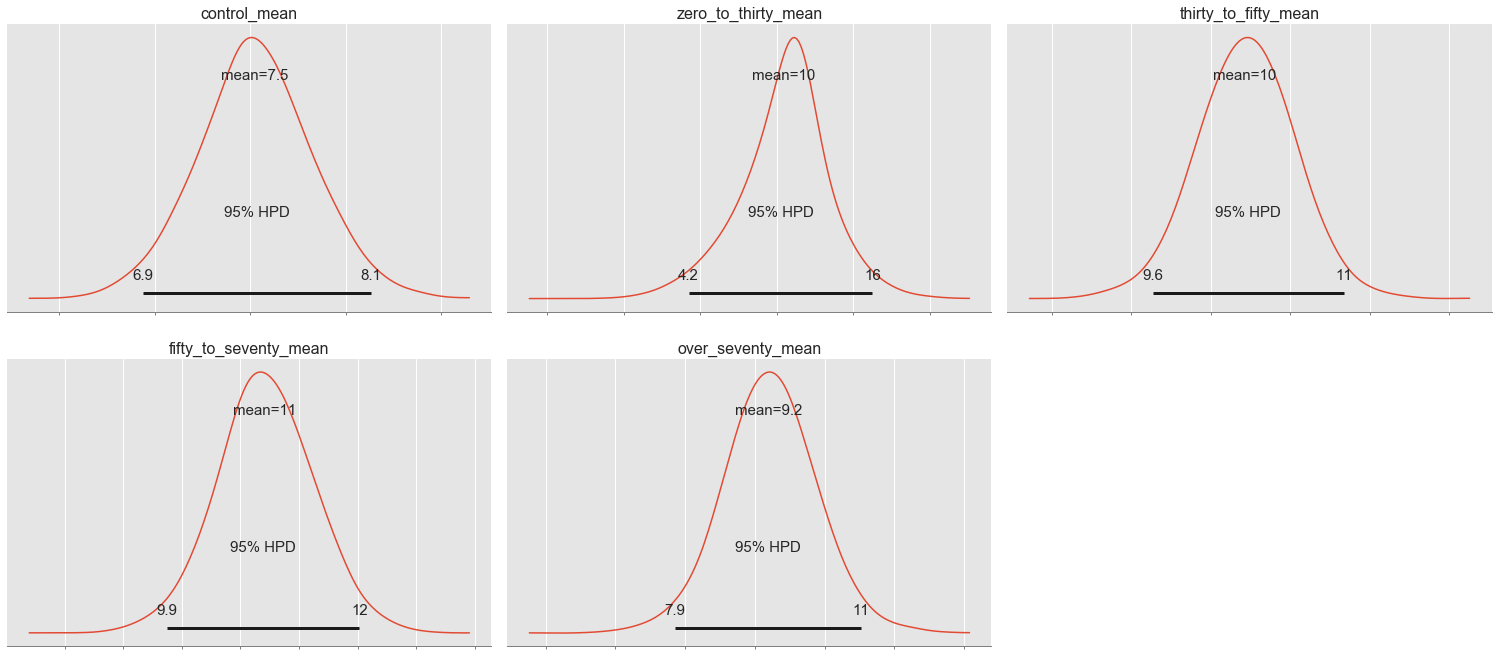

In [286]:
pm.plot_posterior(trace, var_names=['control_mean',
                                     'zero_to_thirty_mean',
                                     'thirty_to_fifty_mean',
                                     'fifty_to_seventy_mean',
                                     'over_seventy_mean'
                                    ],
                 credible_interval=0.95);

In [280]:
means = pm.summary(trace, var_names=['control_mean',
                                     'zero_to_thirty_mean',
                                     'thirty_to_fifty_mean',
                                     'fifty_to_seventy_mean',
                                     'over_seventy_mean'
                                    ])['mean'] ** 3
means = pd.DataFrame(means)
means['ratio_to_control'] = means['mean'].map(lambda x: x / means.loc['control_mean','mean'])
means

,mean,ratio_to_control
control_mean,424.750257,1.000000
zero_to_thirty_mean,1158.948504,2.728541
thirty_to_fifty_mean,1064.957848,2.507257
fifty_to_seventy_mean,1230.202276,2.896296
over_seventy_mean,776.658406,1.828506


In [300]:
dic = {}
for var in means.index:
    dic[var] = {}
    dic[var]['revtrans_mean_mean'] = np.mean(trace.get_values(varname=var) ** 3)
    dic[var]['revtrans_mean_median'] = np.median(trace.get_values(varname=var) ** 3)
means = pd.DataFrame(dic).T
means['mean_ratio_to_control'] = means['revtrans_mean_mean'].map(lambda x: x / means.loc['control_mean','revtrans_mean_mean'])
means['median_ratio_to_control'] = means['revtrans_mean_median'].map(lambda x: x / means.loc['control_mean','revtrans_mean_median'])
means

,revtrans_mean_mean,revtrans_mean_median,mean_ratio_to_control,median_ratio_to_control
control_mean,427.666073,425.051612,1.000000,1.000000
zero_to_thirty_mean,1387.887005,1245.603834,3.245259,2.930477
thirty_to_fifty_mean,1069.182259,1066.736403,2.500040,2.509663
fifty_to_seventy_mean,1231.487805,1223.596166,2.879555,2.878700
over_seventy_mean,790.672650,778.795289,1.848808,1.832237


In [292]:
dic = {}
for name, group in aggs.groupby('DiscountFreqGroup')['AvgTotalCbrt','AvgTotal']:
    dic[name] = {}
    dic[name]['revtrans_mean'] = group.AvgTotalCbrt.mean() ** 3
    dic[name]['revtrans_median'] = group.AvgTotalCbrt.median() ** 3
    dic[name]['actual_mean'] = group.AvgTotal.mean()
    dic[name]['actual_median'] = group.AvgTotal.median()
pd.DataFrame.from_dict(dic, orient='index').round(6)

,revtrans_mean,revtrans_median,actual_mean,actual_median
none,423.388469,442.00000,483.436364,442.00000
0-30%,1458.405000,1458.40500,1458.405000,1458.40500
30-50%,1067.729967,1232.40950,1110.934184,1232.40950
50-70%,1228.877260,1195.97500,1328.439762,1195.97500
>70%,777.687968,690.32625,873.525795,690.32625


# Conclusions:
In this notebook I have managed to show that customers who have an average discount applied to their orders of any amount over zero order 1.9 times as often and spend 2.0 times as much per order. The behavior being the effect of the discount offered is not causal, since companies tend to offer discounts to more frequent/larger buyers. It can be said with certainty, however, that the customers that this company has offered discounts to, on average, make twice as large orders almost twice as often as those customers that have never received discounts.

Further testing showed that it does not necessarily take frequent offers of discount to create the positive effects on customer behavior. The best combination of increased order frequency and increased order size can be achieved by offering the customer discounts on anywhere between zero and 50% of their orders, according to the data, though there were not many customers with non-zero discount frequencies below 30%. A more conservative statement would be to say that the real range tested was discount frequencies between 30% and 50% of orders.

### Making useful visualizations

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

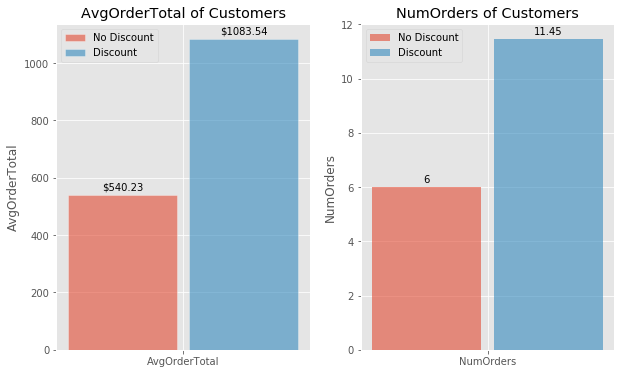

In [22]:
import numpy as np
labels = ['AvgOrderTotal']
labels2 = ['NumOrders']
control = [540.23]
discount = [1083.54]
control2 = [6]
discount2 = [11.45]

x = np.arange(len(labels))  # the label locations
x2 = np.arange(len(labels2))
width = 0.35  # the width of the bars

fig, (ax, ax2) = plt.subplots(ncols=2, figsize=(10,6))
rects1 = ax.bar(x - width/1.8, control, width, label='No Discount', alpha=0.6, edgecolor='w')
rects2 = ax.bar(x + width/1.8, discount, width, label='Discount', alpha=0.6, edgecolor='w')
rects3 = ax2.bar(x2 - width/1.8, control2, width, label='No Discount', alpha=0.6)
rects4 = ax2.bar(x2 + width/1.8, discount2, width, label='Discount', alpha=0.6)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('AvgOrderTotal')
ax.set_title('AvgOrderTotal of Customers')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax2.set_ylabel('NumOrders')
ax2.set_title('NumOrders of Customers')
ax2.set_xticks(x2)
ax2.set_xticklabels(labels2)
ax2.legend()

def autolabel(rects, ax, spec_char=''):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}{}'.format(spec_char,height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1, ax, '$')
autolabel(rects2, ax, '$')
autolabel(rects3, ax2)
autolabel(rects4, ax2)

#fig.tight_layout()

plt.show()

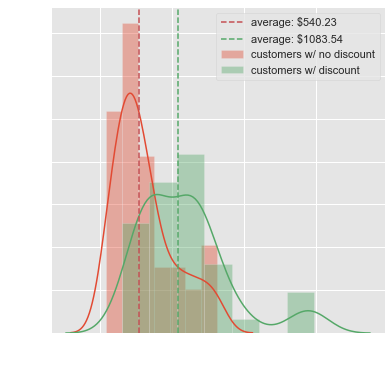

In [171]:
fig, ax = plt.subplots(1, figsize=(6,6))
sns.distplot(aggs[aggs.DiscountGroup=='no_discount'].AvgTotal, label='customers w/ no discount', ax=ax)
sns.distplot(aggs[aggs.DiscountGroup=='discount'].AvgTotal, label='customers w/ discount', ax=ax, color='g')
ax.axvline(x=540.23, color='r', ls='--', label='average: $540.23')
ax.axvline(x=1083.54, color='g', ls='--', label='average: $1083.54')
ax.legend()

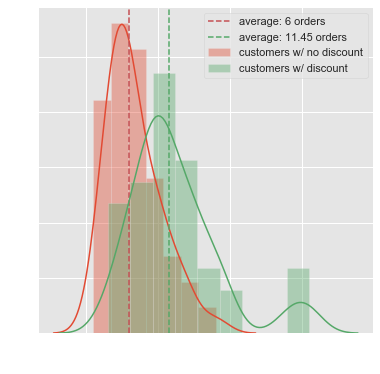

In [170]:
fig, ax = plt.subplots(1, figsize=(6,6))
sns.distplot(aggs[aggs.DiscountGroup=='no_discount'].NumOrders, label='customers w/ no discount', ax=ax)
ax.axvline(x=6, color='r', ls='--', label='average: 6 orders')
sns.distplot(aggs[aggs.DiscountGroup=='discount'].NumOrders, label='customers w/ discount', ax=ax, color='g')
ax.axvline(x=11.45, color='g', ls='--', label='average: 11.45 orders')
ax.legend()

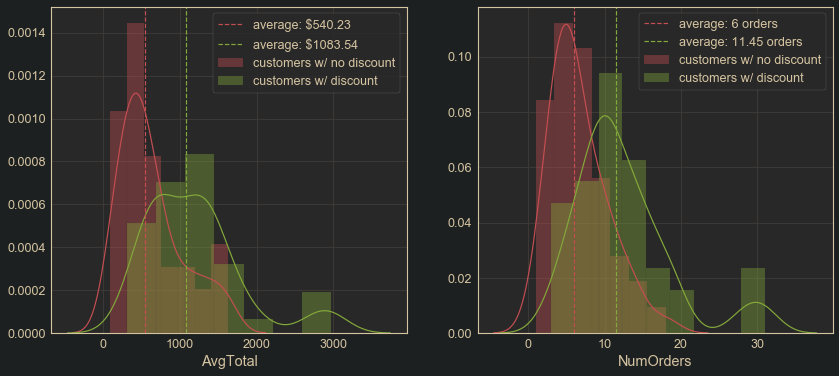

In [48]:
fig, (ax, ax2) = plt.subplots(ncols=2, figsize=(14,6))

sns.distplot(aggs[aggs.DiscountGroup=='no_discount'].AvgTotal, label='customers w/ no discount', ax=ax)
sns.distplot(aggs[aggs.DiscountGroup=='discount'].AvgTotal, label='customers w/ discount', ax=ax, color='g')
ax.axvline(x=540.23, color='r', ls='--', label='average: $540.23')
ax.axvline(x=1083.54, color='g', ls='--', label='average: $1083.54')
ax.legend()

sns.distplot(aggs[aggs.DiscountGroup=='no_discount'].NumOrders, label='customers w/ no discount', ax=ax2)
ax2.axvline(x=6, color='r', ls='--', label='average: 6 orders')
sns.distplot(aggs[aggs.DiscountGroup=='discount'].NumOrders, label='customers w/ discount', ax=ax2, color='g')
ax2.axvline(x=11.45, color='g', ls='--', label='average: 11.45 orders')
ax2.legend()

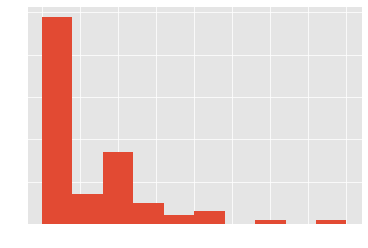

In [161]:
aggs.WeightedDiscount.hist()